---

# Credit Card Fraud Detector - Neural Net Classifier Model

## Template: Lab 2 and Lab 3

In [28]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [7]:
import torch
import torch.nn.functional as F
import torch.nn as nn

import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sn
import numpy as np
#RANDOM_SEED = 123
#DEVICE = ('cuda:0' if torch.cuda.is_available() else 'cpu')

In [30]:
#%pip install torch torchvision torchaudio

In [17]:
df = pd.read_csv('creditcard.csv')
X = df.loc[:,'V1':'V28']
y = df['Class'].values

dat_fl = df.drop(['Time','Amount'],axis=1) 

#'V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21''V22','V23	V24	V25	V26	V27	V28
#columns from dataset
#Time	V1	V2	V3	V4	V5	V6	V7	V8	V9	V10	V11	V12	V13	V14	V15	V16	V17	V18	V19	V20	V21	V22	V23	V24	V25	V26	V27	V28	Amount	Class
#dat_fl.head()

In [18]:
# Convert dataframe to numpy array for downstream model processing

dat_fl=dat_fl.to_numpy() #This is used in dataloader
X = X.to_numpy() #This is used in training
type(dat_fl)

numpy.ndarray

## LeNet5 Model

In [27]:
##########################
### SETTINGS
##########################

# Hyperparameters
RANDOM_SEED = 123
LEARNING_RATE = 0.1
BATCH_SIZE = 128
NUM_EPOCHS = 25

# Architecture
NUM_FEATURES = 28
NUM_CLASSES = 2

# Other
if torch.cuda.is_available():
    DEVICE = "cuda:0"
else:
    DEVICE = "cpu"

GRAYSCALE = False

In [98]:
##########################
### Dataset
##########################

train_mean = (0.5, 0.5, 0.5)
train_std = (0.5, 0.5, 0.5)

#resize_transform = transforms.Compose([transforms.Resize((32, 32)),
#                                       transforms.ToTensor(),
#                                       transforms.Normalize(train_mean, train_std)])

# Note transforms.ToTensor() scales input images
# to 0-1 range
#Reference: https://stackoverflow.com/questions/50544730/how-do-i-split-a-custom-dataset-into-training-and-test-datasets
train_size = int(0.8 * len(dat_fl))
test_size = len(dat_fl) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dat_fl, [train_size, test_size])


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          num_workers=8,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=BATCH_SIZE,
                         num_workers=8,
                         shuffle=False)

# Checking the dataset
#for images, labels in train_loader:  
#    print('Image batch dimensions:', images.shape)
#    print('Image label dimensions:', labels.shape)
#    break

# Checking the dataset
#for images, labels in train_loader:  
#    print('Image batch dimensions:', images.shape)
#    print('Image label dimensions:', labels.shape)
#    break

#len(train_loader)

In [104]:
##########################
### MODEL
##########################


class LeNet5(nn.Module):

    def __init__(self, num_classes, grayscale=False):
        super(LeNet5, self).__init__()
        
        self.grayscale = grayscale
        self.num_classes = num_classes

        if self.grayscale:
            in_channels = 1
        else:
            in_channels = 3

        self.features = nn.Sequential(
            
            #nn.Conv2d(in_channels, 6*in_channels, kernel_size=5),
            #nn.Conv1d(28,50,kernel_size=5),
            #nn.Tanh(),
            #nn.MaxPool2d(kernel_size=2),
            #nn.MaxPool1d(kernel_size=2),
            #nn.Conv2d(6*in_channels, 16*in_channels, kernel_size=5),
            #nn.Conv1d(50,50,kernel_size=5),
            #nn.Tanh(),
            #nn.MaxPool1d(kernel_size=2)
            #nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
        #    nn.Linear(16*5*5*in_channels, 120*in_channels),
            nn.Linear(28, 50),
            nn.Tanh(),
        #    nn.Linear(120*in_channels, 84*in_channels),
            nn.Linear(50, 50),
            nn.Tanh(),
        #    nn.Linear(84*in_channels, num_classes),
            nn.Linear(50, num_classes),
        )


    def forward(self, x):
        x = self.features(x)
        
        #out = self.linear_1(x)
        #out = F.relu(out)
        
        #logits = self.linear_out(out)
        #probas = F.softmax(logits, dim=1)
        #return logits, probas
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [32]:
device = torch.device(DEVICE)
torch.manual_seed(0)

for epoch in range(2):

    for batch_idx, batch_data in enumerate(train_loader):
        
        print('Epoch:', epoch+1, end='')
        print(' | Batch index:', batch_idx, end='')
        #print(' | Batch size:', y.size()[0])
        
        x = batch_data#[:-1]#.to(device)
        print(x)
        #y = y.to(device)
        #print(y)
        break

Epoch: 1 | Batch index: 0tensor([[-14.7476,  -5.0295,  -6.3889,  ...,  -2.9613,   1.1052,   0.0000],
        [  2.2910,  -1.3305,  -1.4442,  ...,  -0.0268,  -0.0668,   0.0000],
        [ -1.1676,  -0.2066,   1.1554,  ...,  -0.0801,  -0.0553,   0.0000],
        ...,
        [ -2.0438,   0.5151,  -0.6268,  ...,  -0.4288,  -0.3385,   0.0000],
        [ -1.2216,  -0.4483,   2.9533,  ...,   0.2768,   0.1225,   0.0000],
        [ -1.1267,  -0.1775,   1.4311,  ...,   0.0560,   0.1513,   0.0000]],
       dtype=torch.float64)
Epoch: 2 | Batch index: 0tensor([[-0.7860, -0.2472,  2.3051,  ...,  0.1630,  0.1280,  0.0000],
        [-0.2241,  1.2564, -0.8136,  ...,  0.0986,  0.0149,  0.0000],
        [-0.5316,  0.2649, -0.2380,  ...,  0.1956,  0.2615,  0.0000],
        ...,
        [ 1.2632, -0.1119,  0.4771,  ..., -0.0776, -0.0049,  0.0000],
        [ 1.1934, -0.2386, -0.1128,  ...,  0.0285,  0.0196,  0.0000],
        [ 1.1321, -0.3686,  0.5560,  ..., -0.0545, -0.0046,  0.0000]],
       dtype=torch

In [99]:
len(batch_data)

128

In [105]:

torch.manual_seed(RANDOM_SEED)

model1 = LeNet5(NUM_CLASSES, GRAYSCALE)
model1 = model1.to(DEVICE)

optimizer = torch.optim.Adam(model1.parameters(), LEARNING_RATE)

# Training

Epoch: 001/025 | Train: 99.974%
Time elapsed: 0.04 min
Epoch: 001/025 | Train: 99.974%
Time elapsed: 0.07 min
Epoch: 001/025 | Train: 99.974%
Time elapsed: 0.09 min
Epoch: 001/025 | Train: 99.974%
Time elapsed: 0.11 min
Epoch: 001/025 | Train: 99.974%
Time elapsed: 0.13 min
Epoch: 001/025 | Train: 99.974%
Time elapsed: 0.15 min
Epoch: 002/025 | Train: 99.974%
Time elapsed: 0.17 min
Epoch: 002/025 | Train: 99.974%
Time elapsed: 0.19 min
Epoch: 002/025 | Train: 99.974%
Time elapsed: 0.21 min
Epoch: 002/025 | Train: 99.974%
Time elapsed: 0.23 min
Epoch: 002/025 | Train: 99.974%
Time elapsed: 0.25 min
Epoch: 002/025 | Train: 99.974%
Time elapsed: 0.27 min
Epoch: 003/025 | Train: 99.974%
Time elapsed: 0.28 min
Epoch: 003/025 | Train: 99.974%
Time elapsed: 0.30 min
Epoch: 003/025 | Train: 99.975%
Time elapsed: 0.32 min
Epoch: 003/025 | Train: 99.975%
Time elapsed: 0.34 min
Epoch: 003/025 | Train: 99.975%
Time elapsed: 0.36 min
Epoch: 003/025 | Train: 99.975%
Time elapsed: 0.38 min
Epoch: 004

C:\Users\vijip\AppData\Local\Temp\ipykernel_60536\3952520287.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (12,7))


Epoch: 004/025 | Train: 99.975%
Time elapsed: 0.44 min
Epoch: 004/025 | Train: 99.975%
Time elapsed: 0.46 min
Epoch: 004/025 | Train: 99.975%
Time elapsed: 0.48 min
Epoch: 004/025 | Train: 99.975%
Time elapsed: 0.50 min
Epoch: 005/025 | Train: 99.975%
Time elapsed: 0.52 min
Epoch: 005/025 | Train: 99.975%
Time elapsed: 0.54 min
Epoch: 005/025 | Train: 99.975%
Time elapsed: 0.55 min
Epoch: 005/025 | Train: 99.975%
Time elapsed: 0.58 min
Epoch: 005/025 | Train: 99.976%
Time elapsed: 0.60 min
Epoch: 005/025 | Train: 99.976%
Time elapsed: 0.62 min
Epoch: 006/025 | Train: 99.976%
Time elapsed: 0.64 min
Epoch: 006/025 | Train: 99.976%
Time elapsed: 0.66 min
Epoch: 006/025 | Train: 99.977%
Time elapsed: 0.67 min
Epoch: 006/025 | Train: 99.977%
Time elapsed: 0.70 min
Epoch: 006/025 | Train: 99.977%
Time elapsed: 0.71 min
Epoch: 006/025 | Train: 99.977%
Time elapsed: 0.74 min
Epoch: 007/025 | Train: 99.978%
Time elapsed: 0.76 min
Epoch: 007/025 | Train: 99.978%
Time elapsed: 0.77 min
Epoch: 007

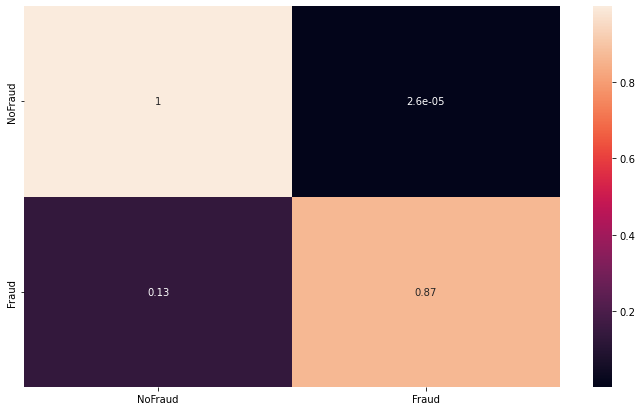

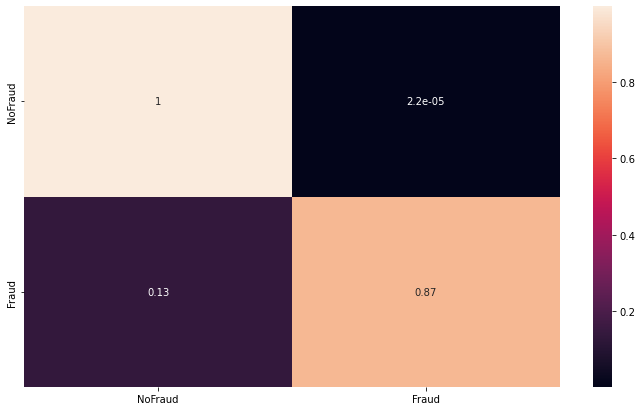

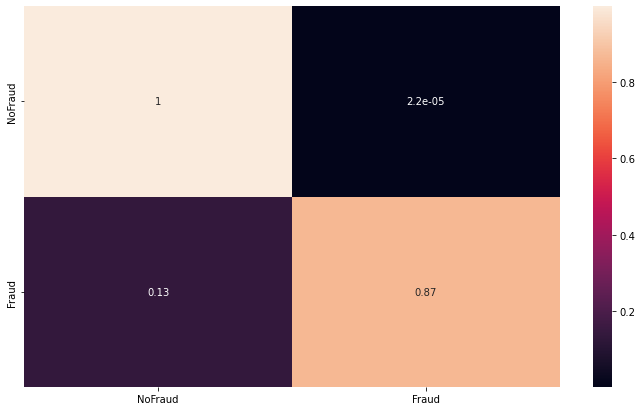

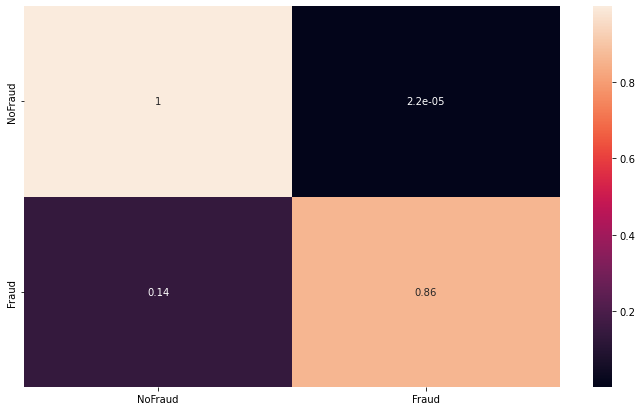

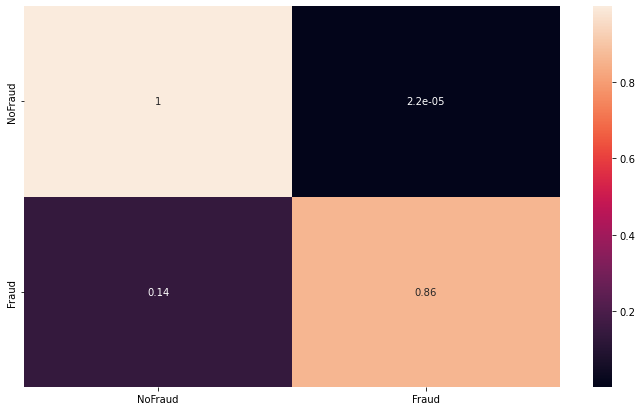

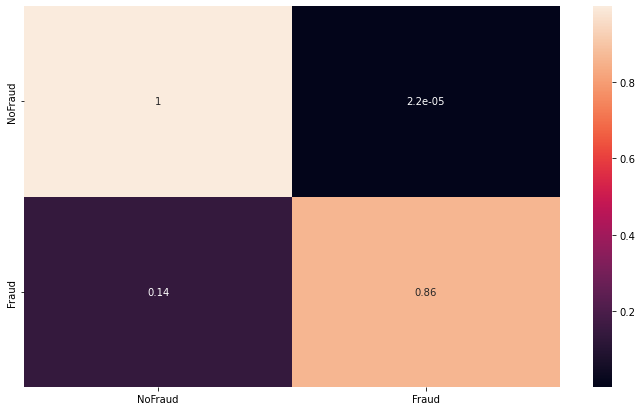

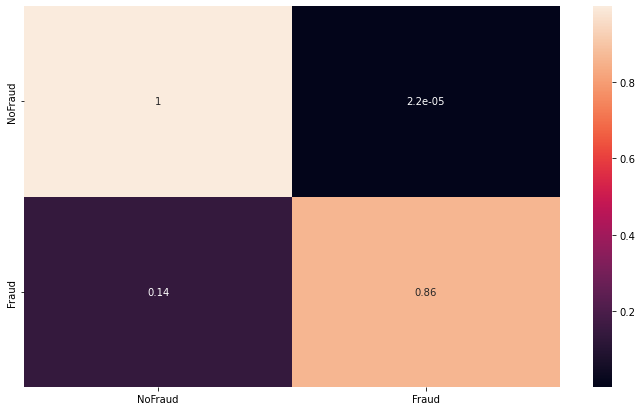

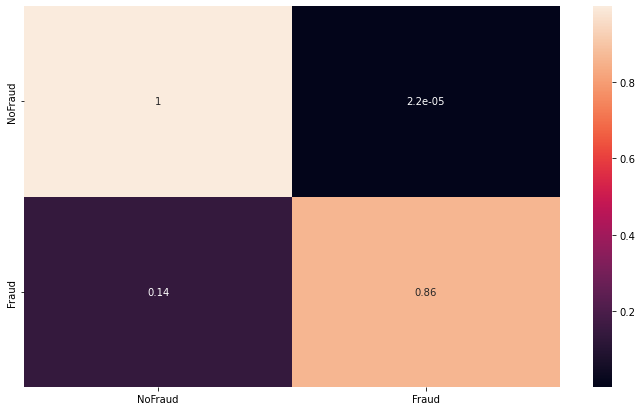

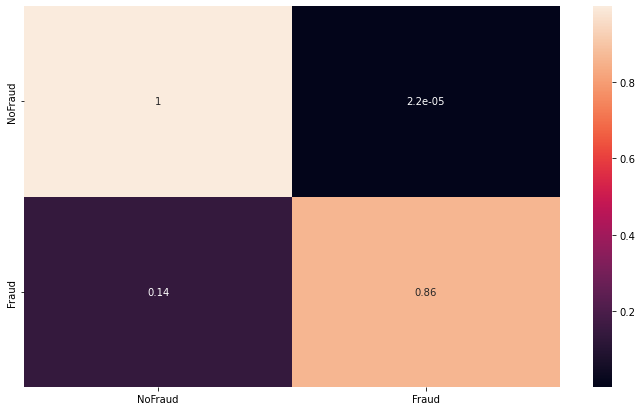

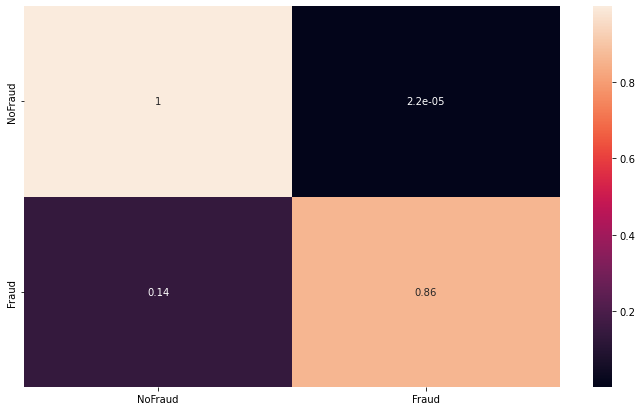

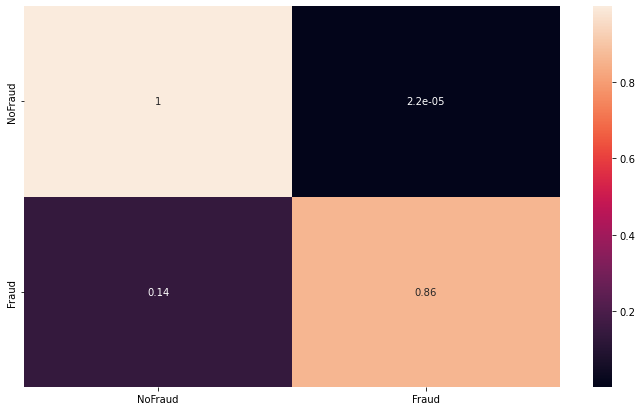

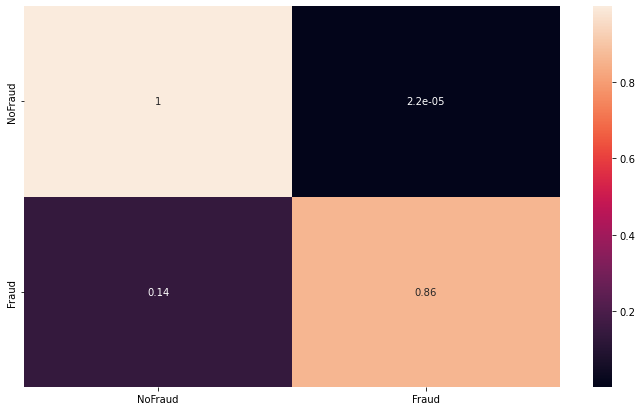

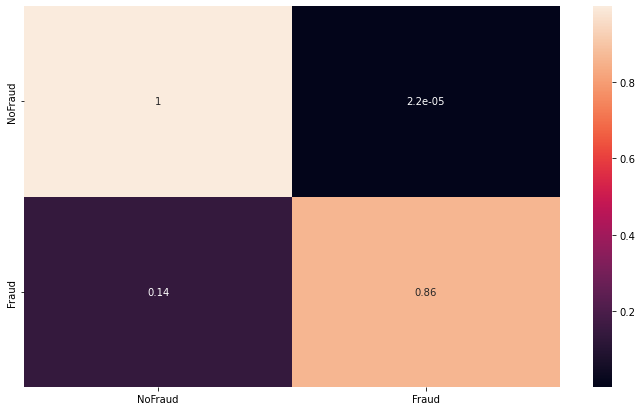

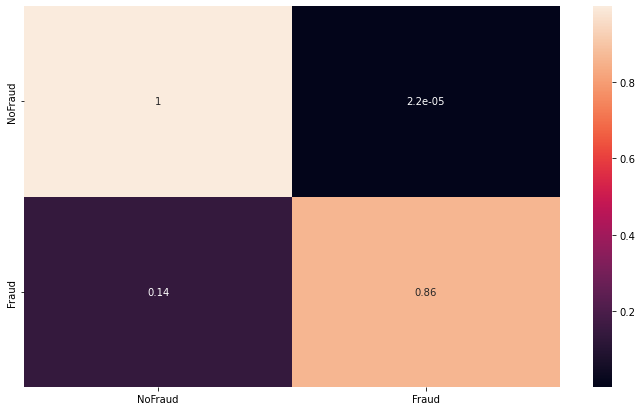

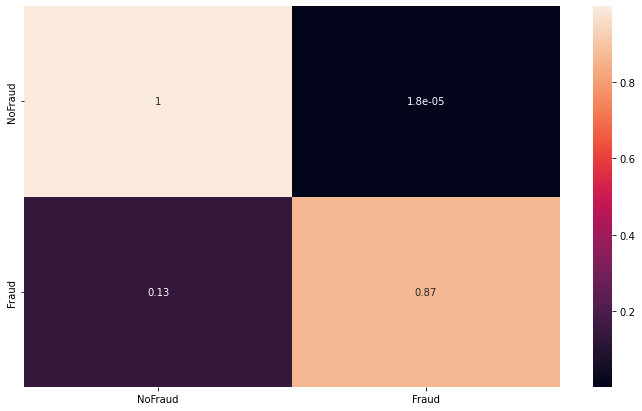

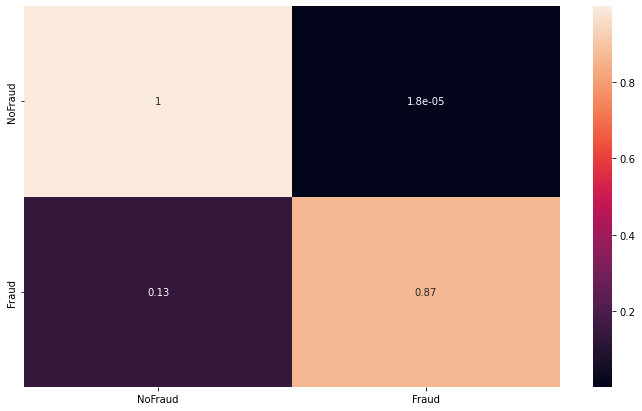

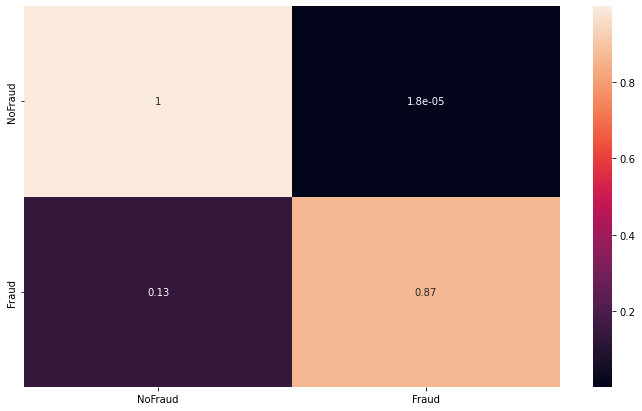

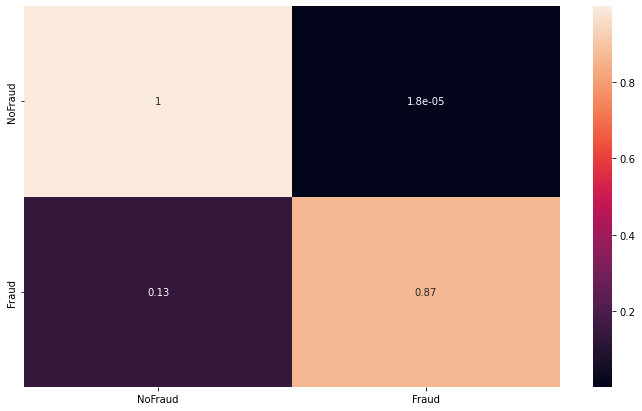

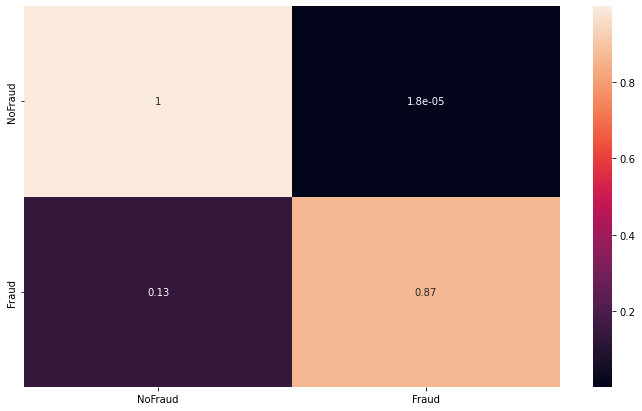

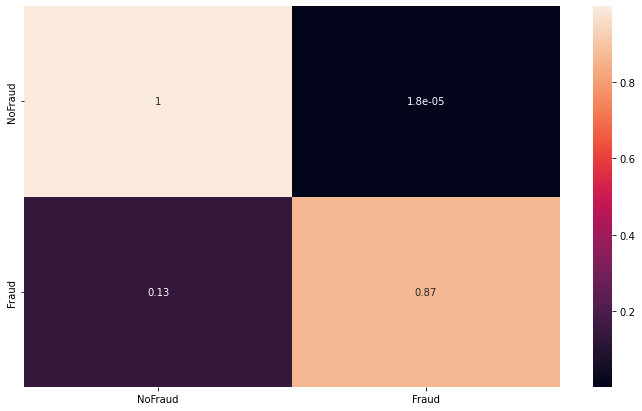

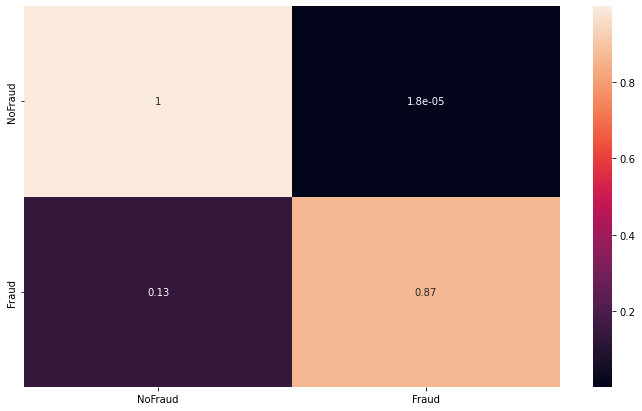

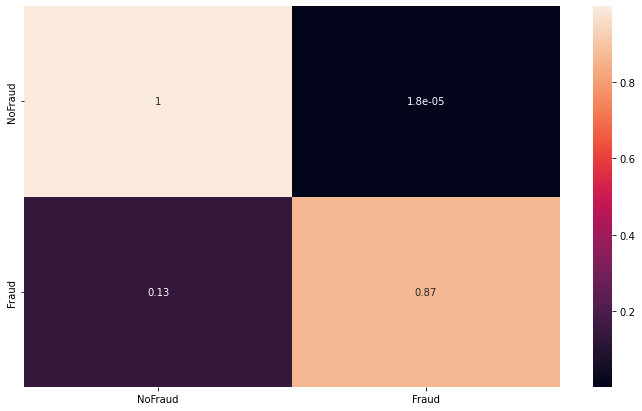

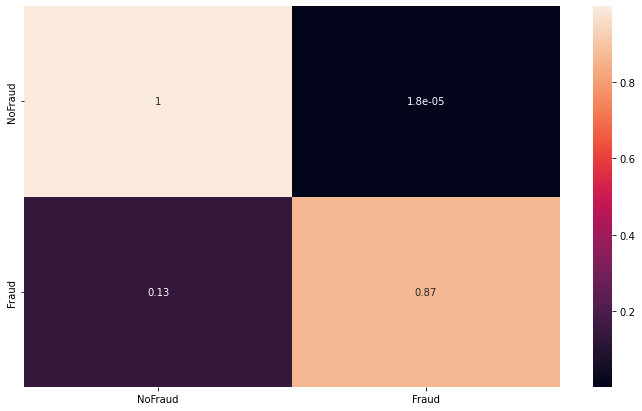

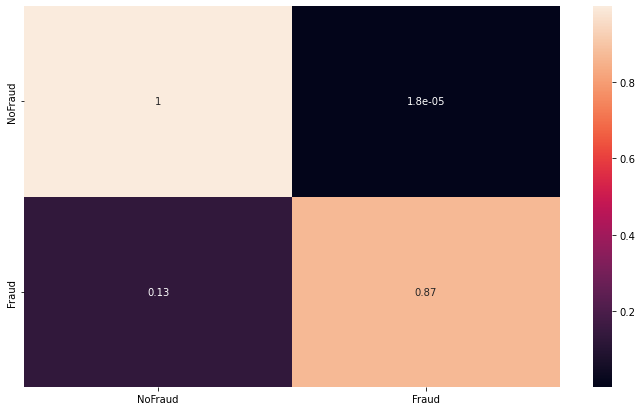

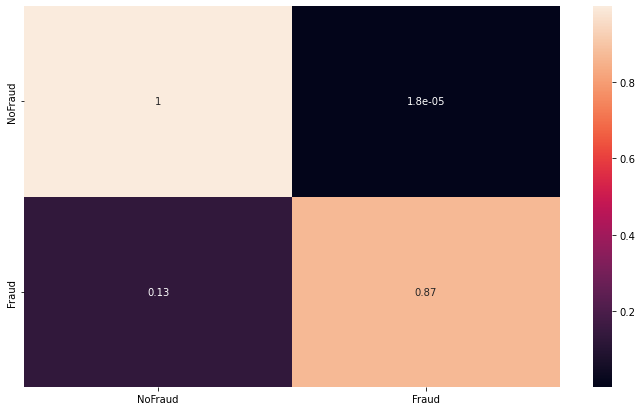

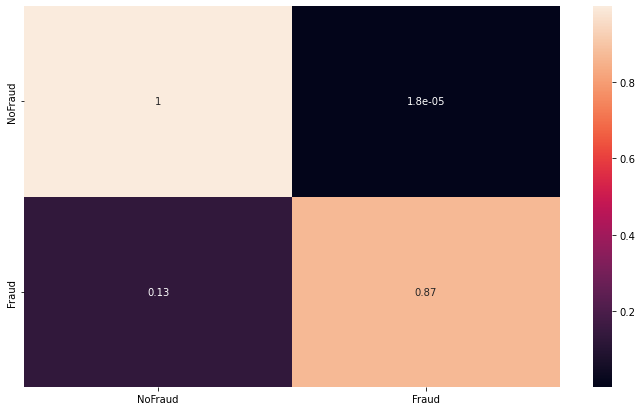

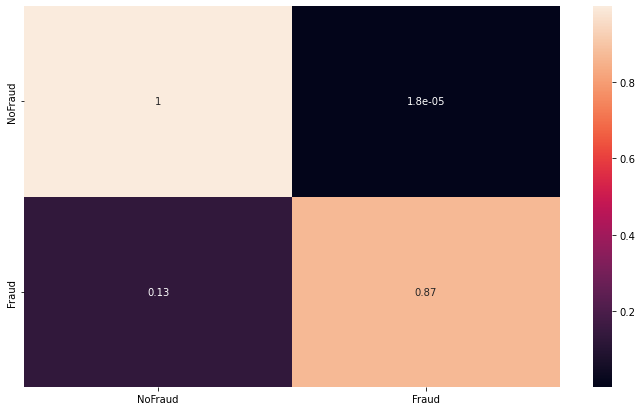

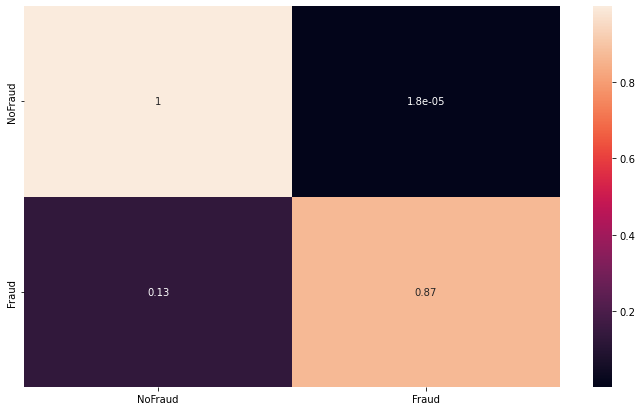

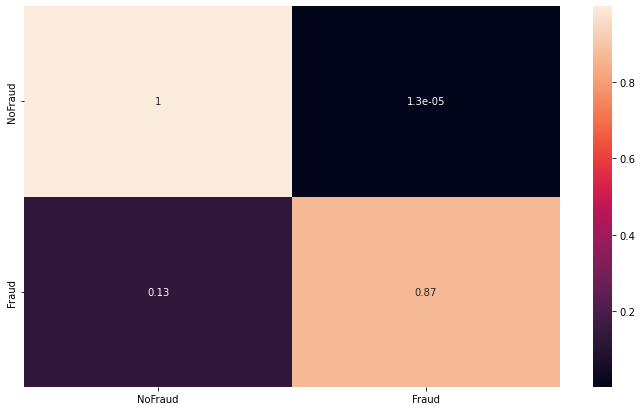

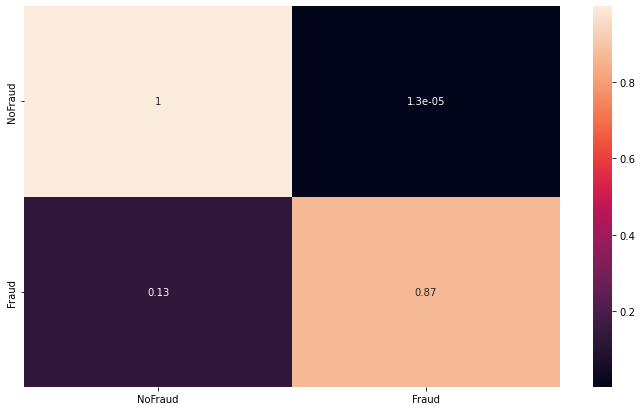

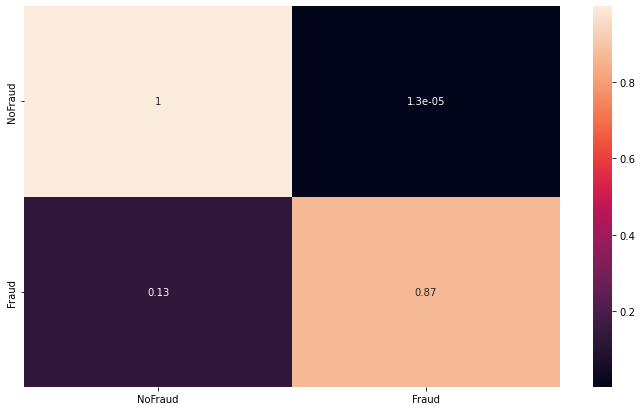

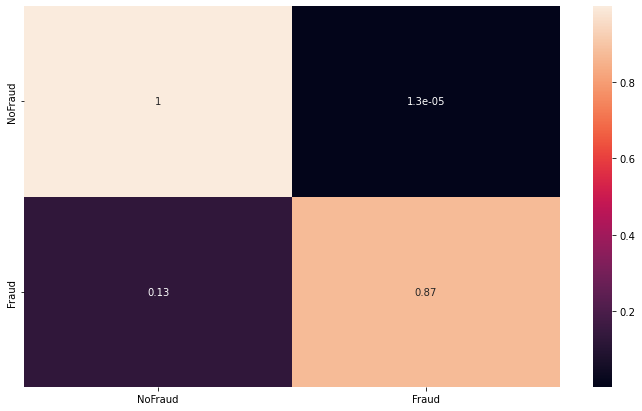

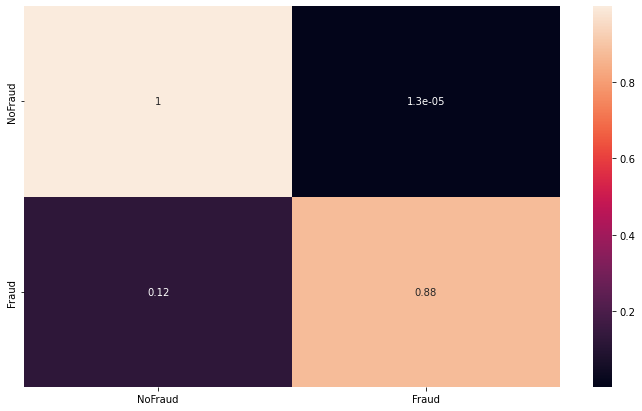

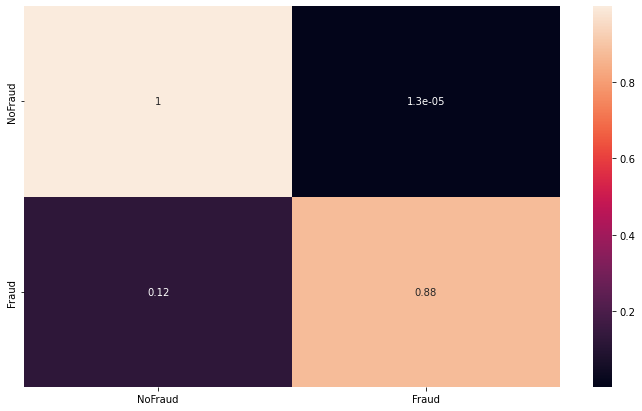

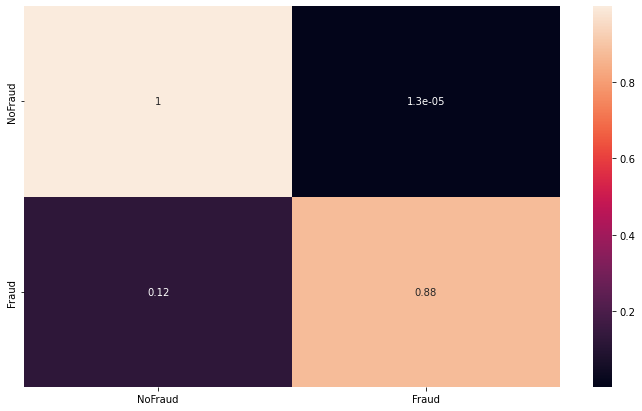

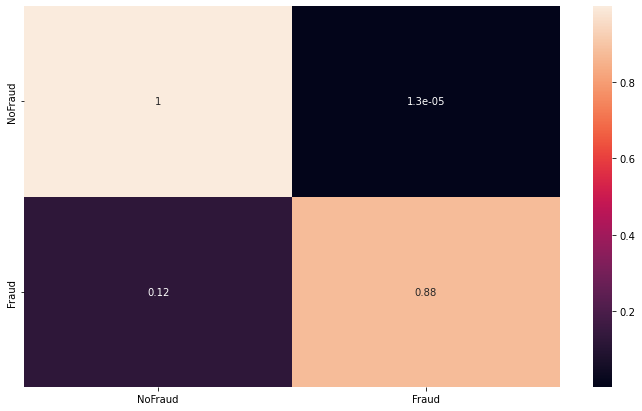

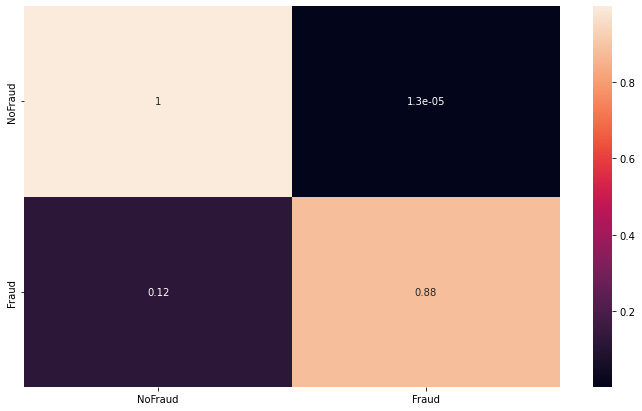

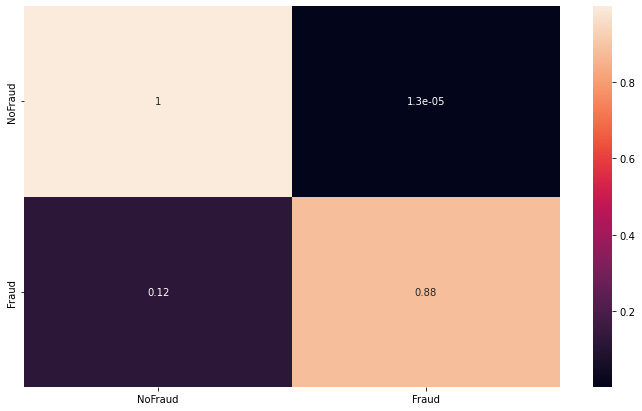

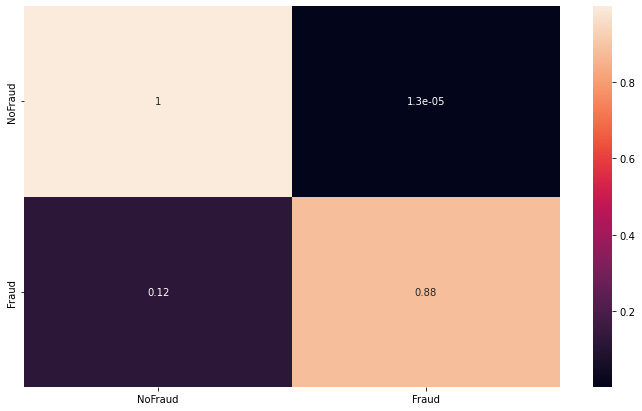

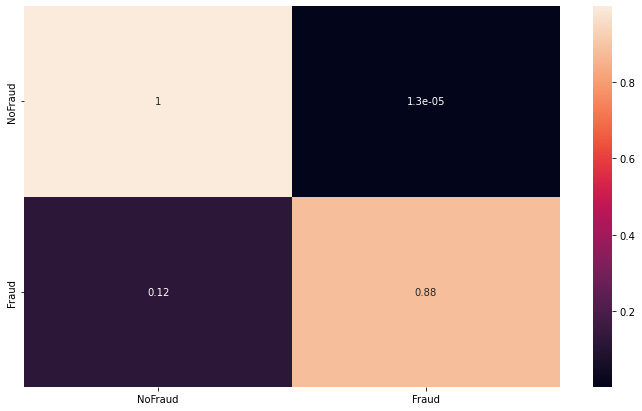

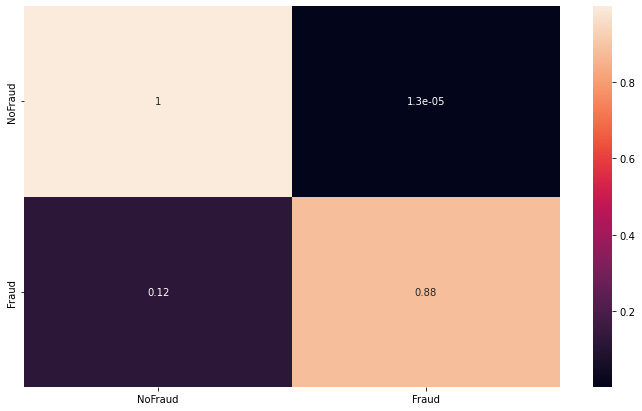

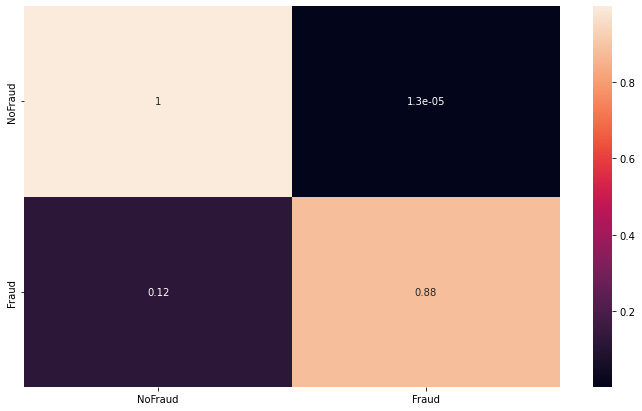

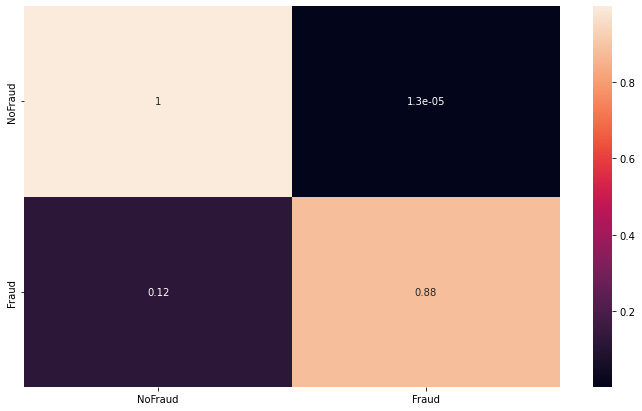

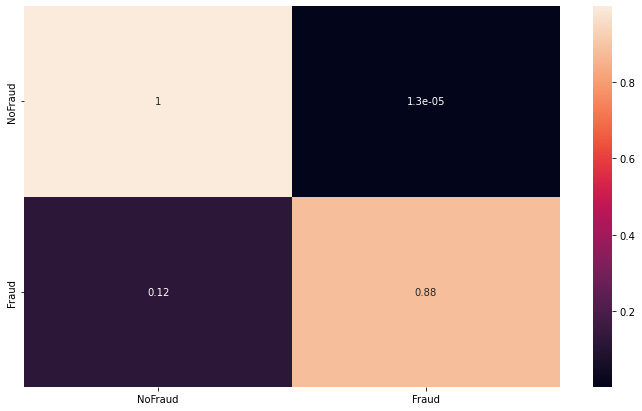

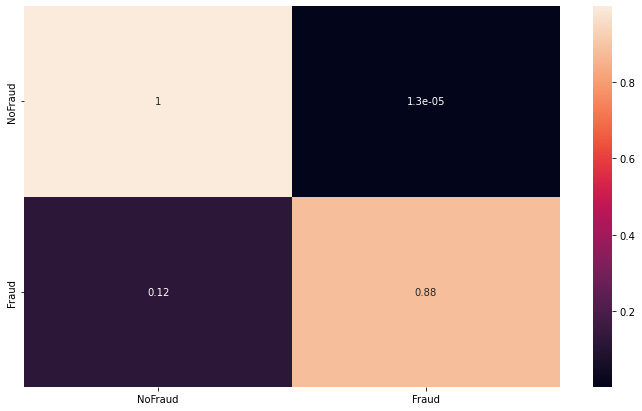

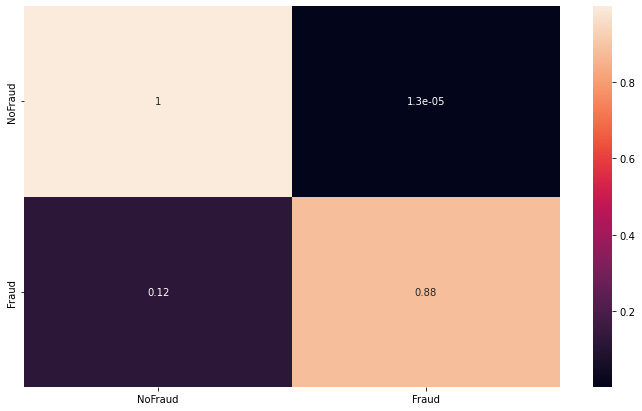

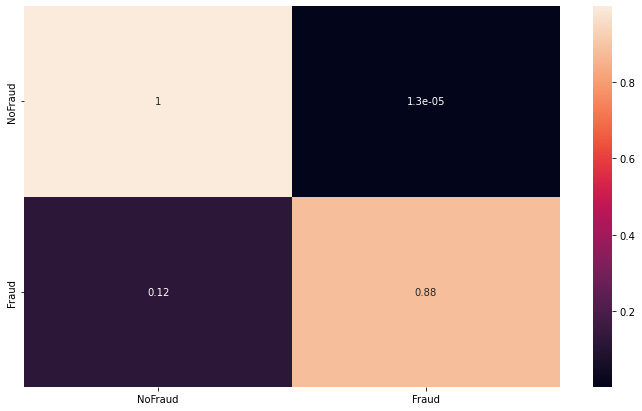

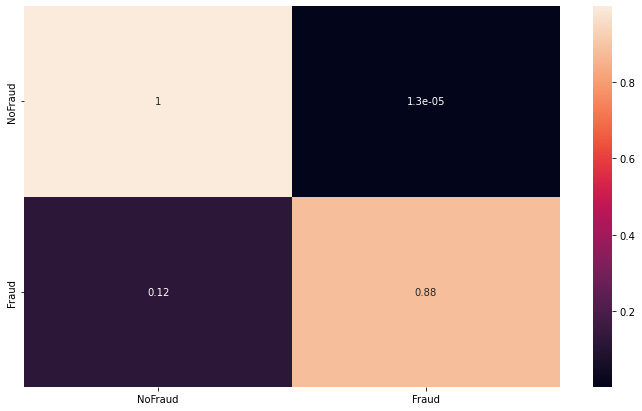

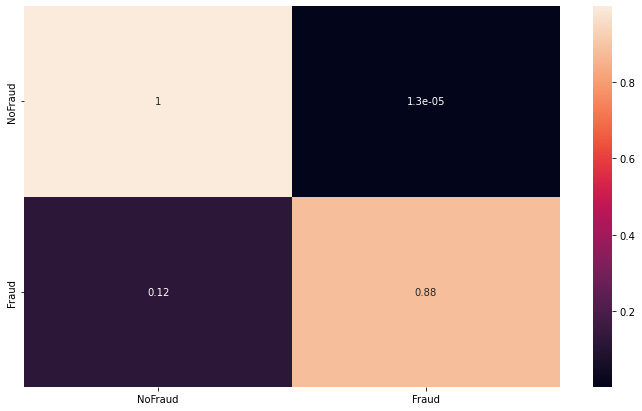

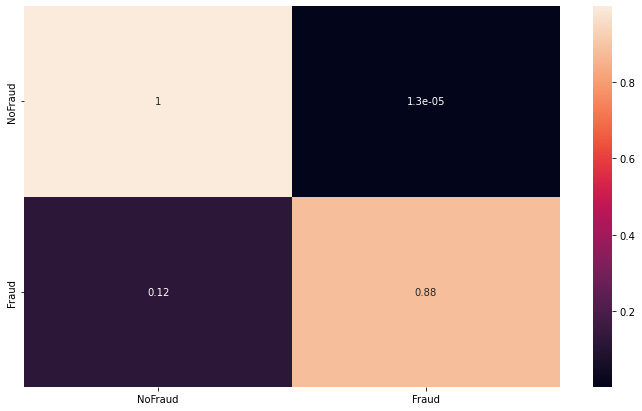

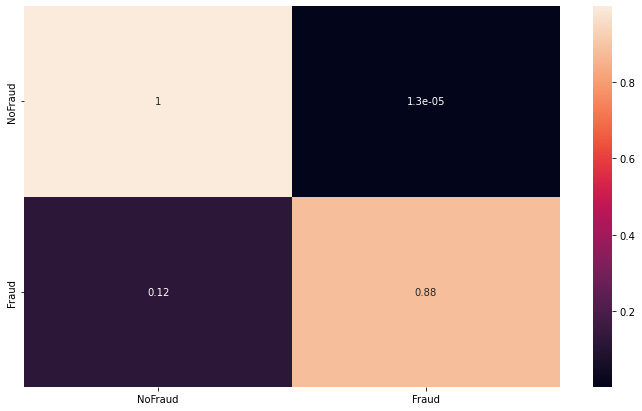

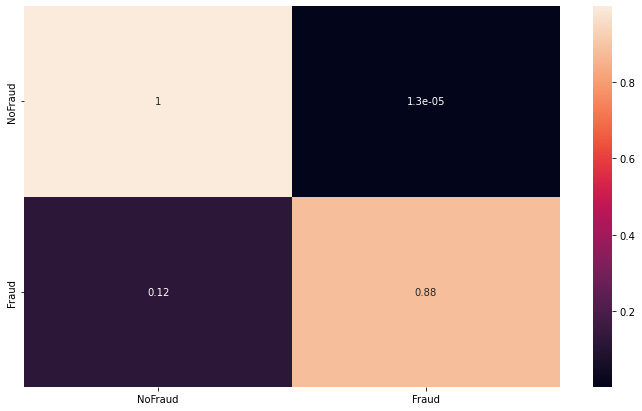

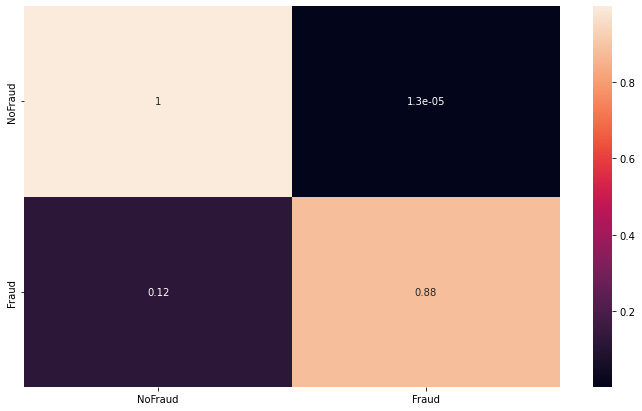

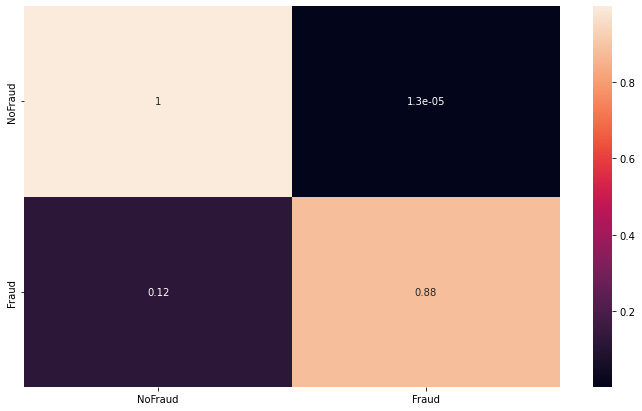

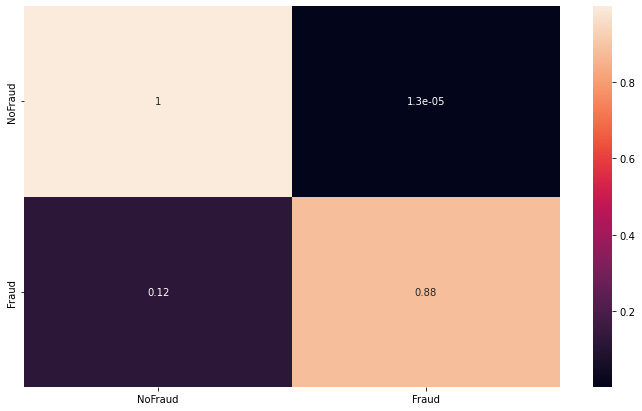

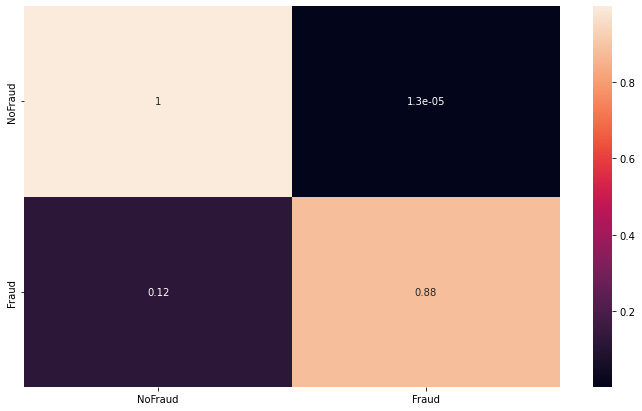

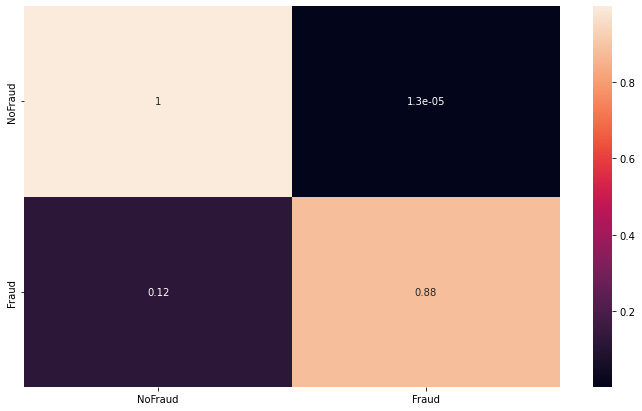

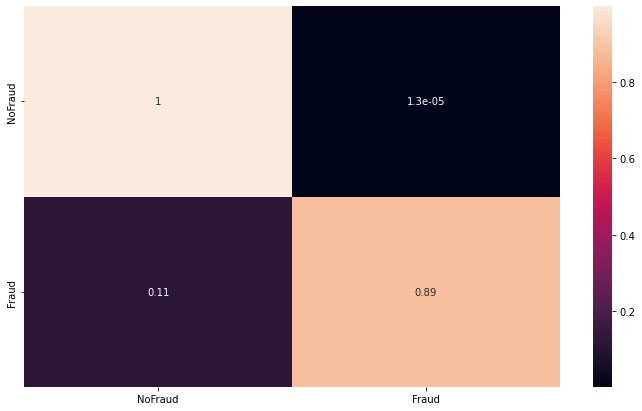

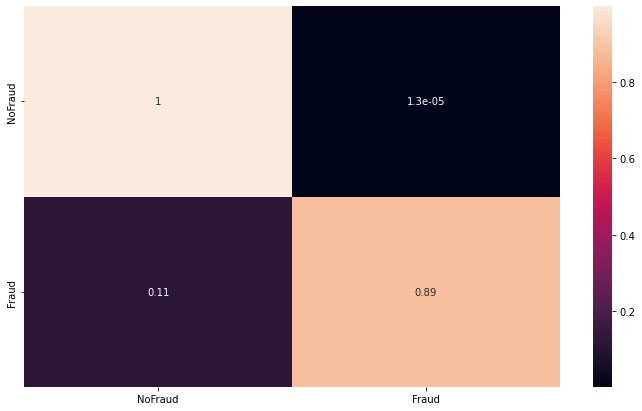

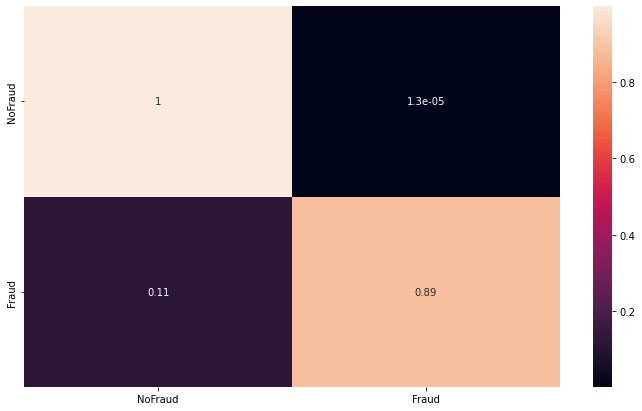

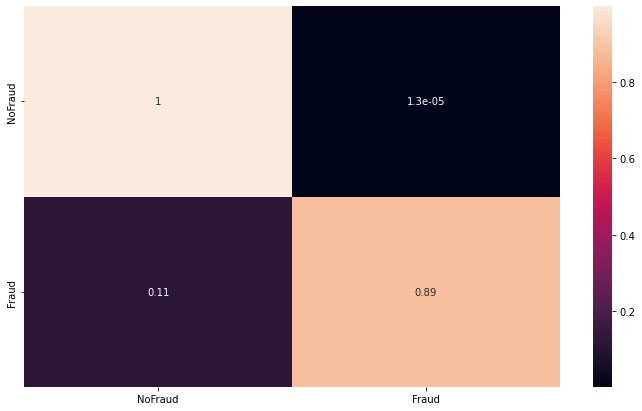

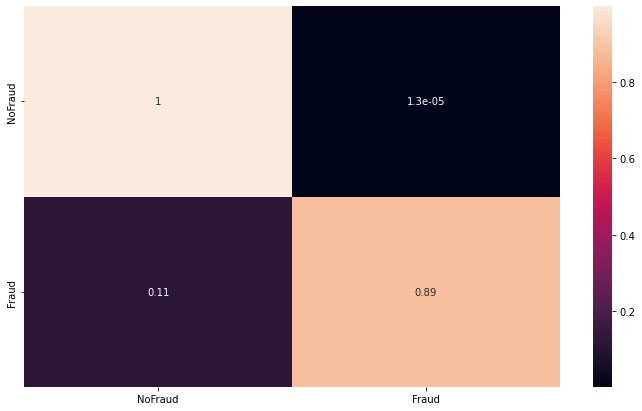

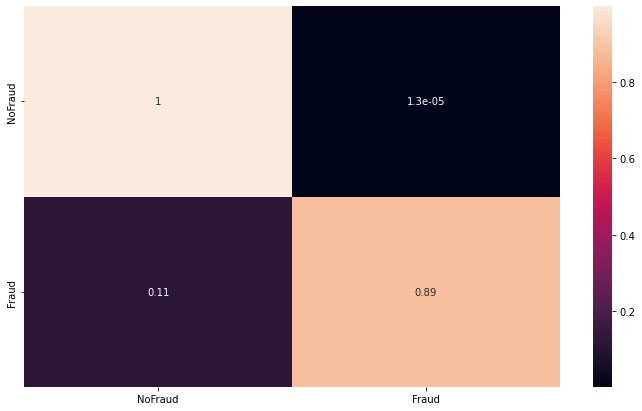

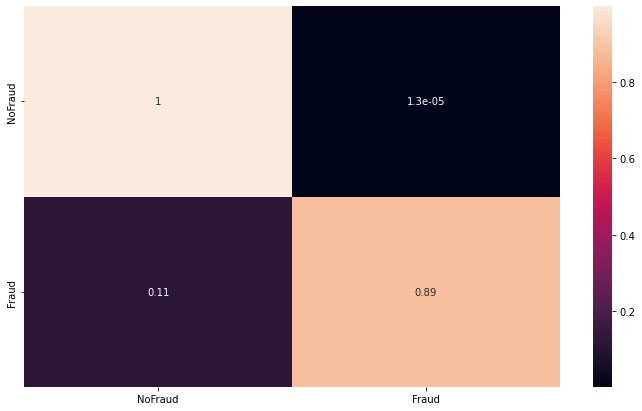

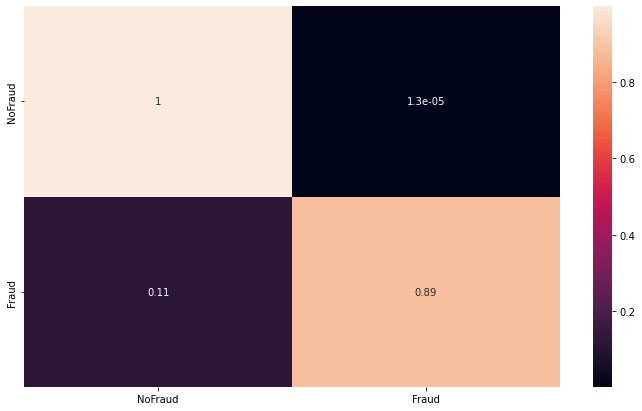

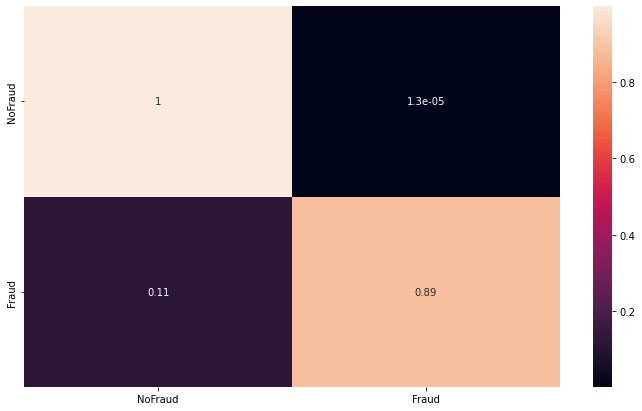

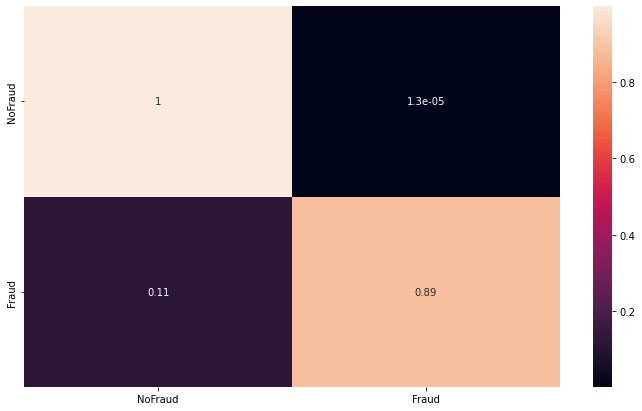

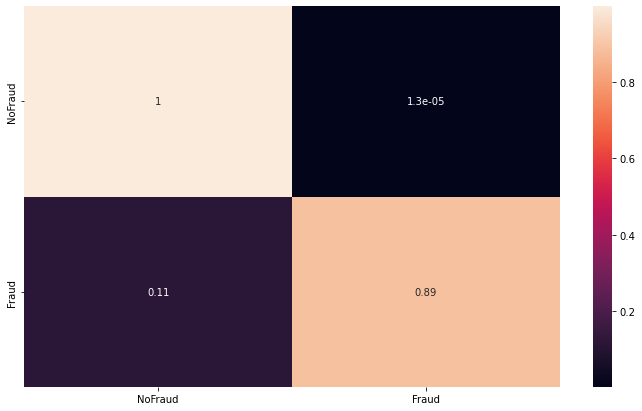

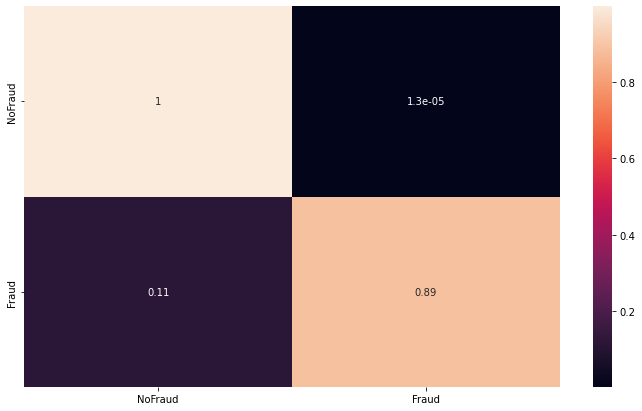

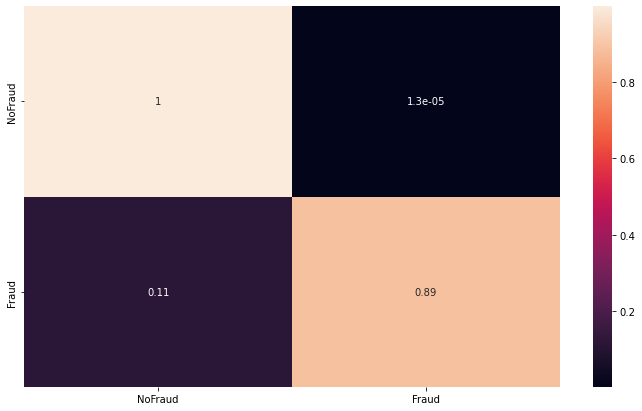

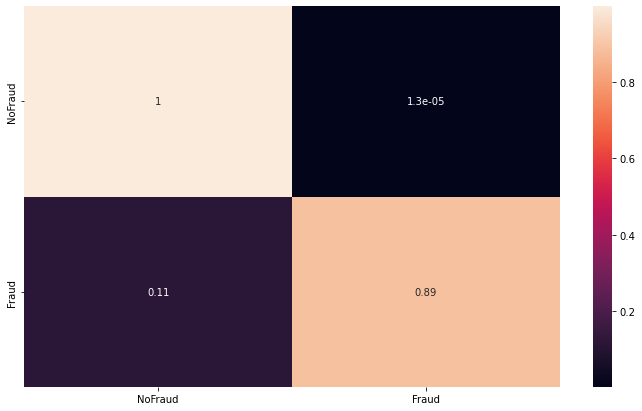

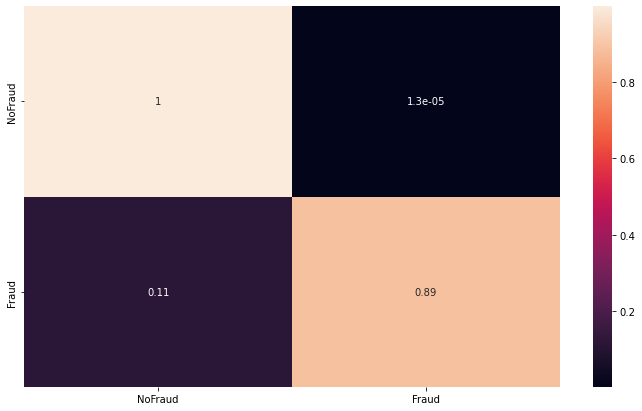

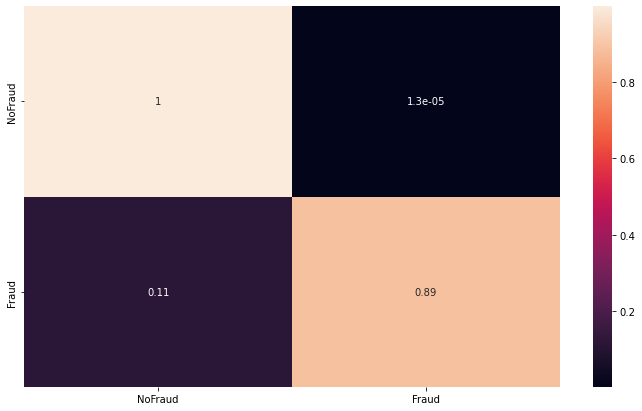

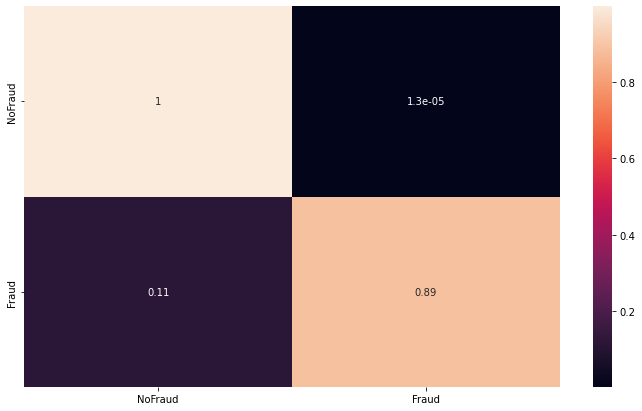

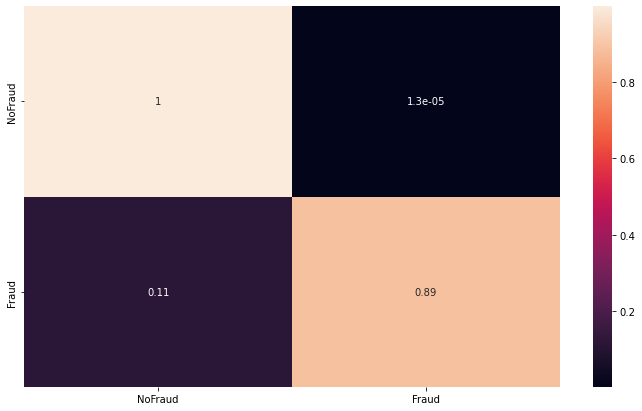

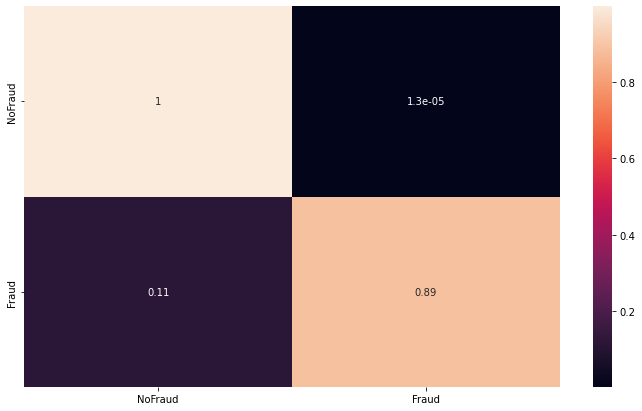

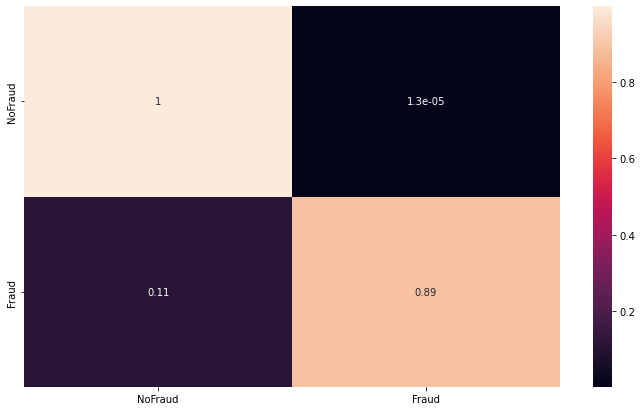

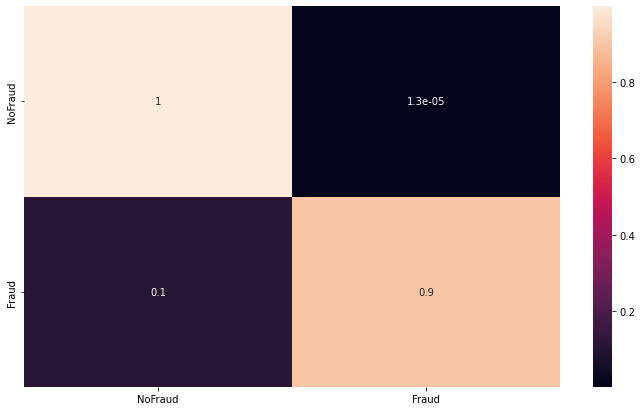

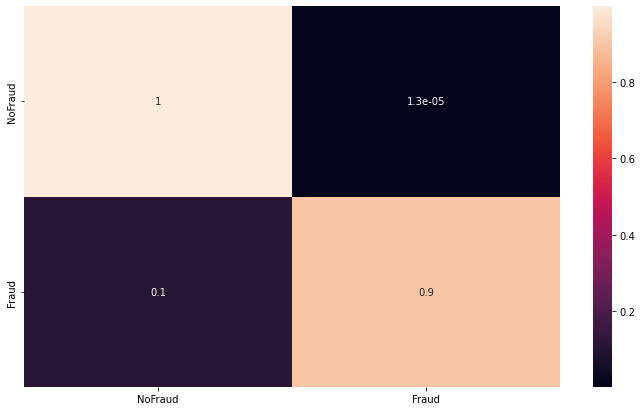

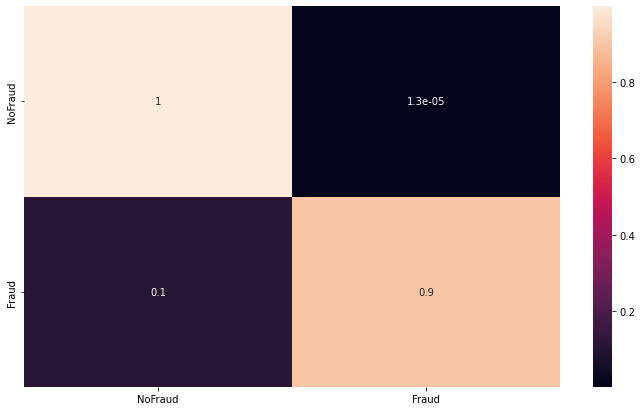

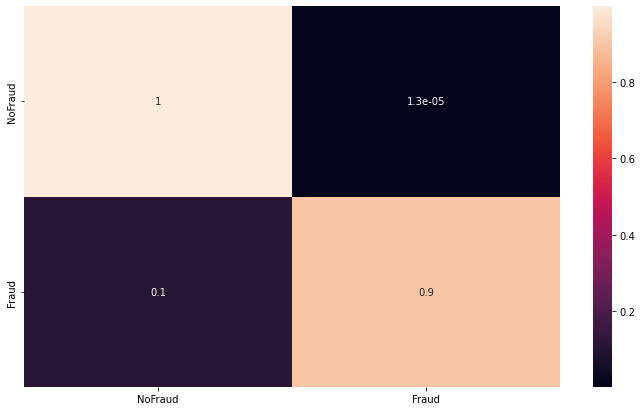

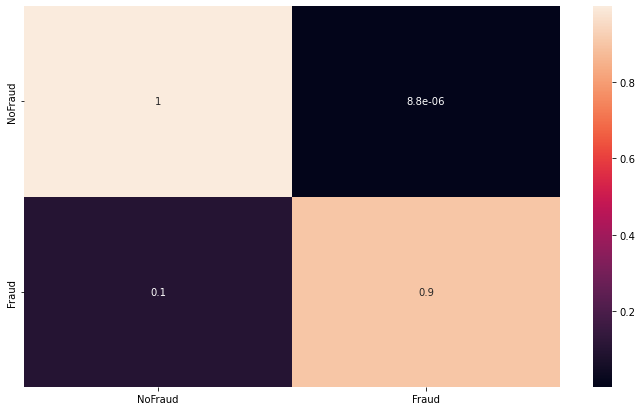

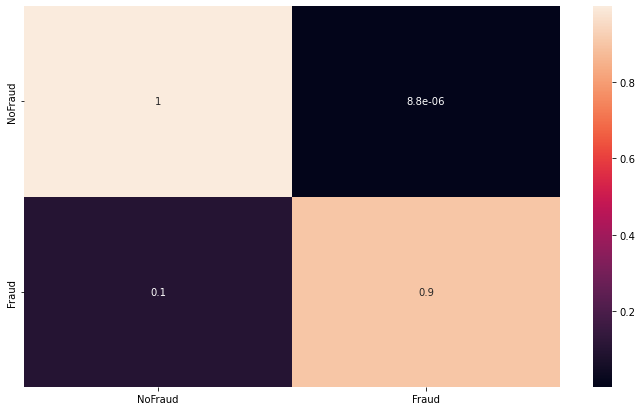

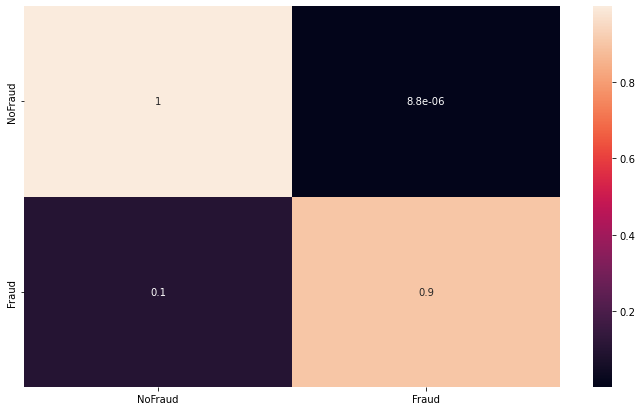

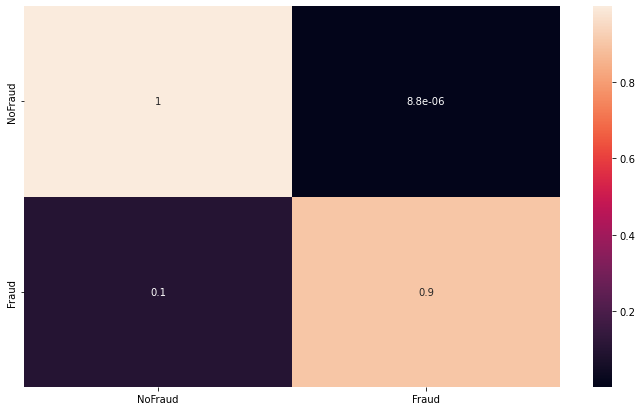

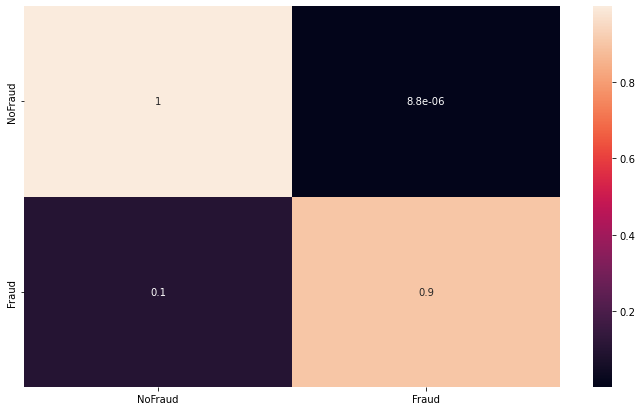

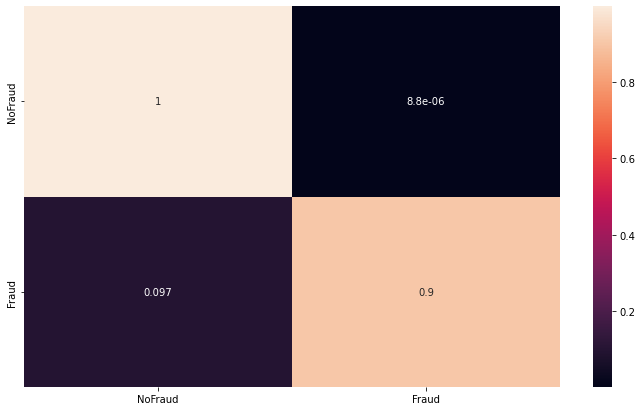

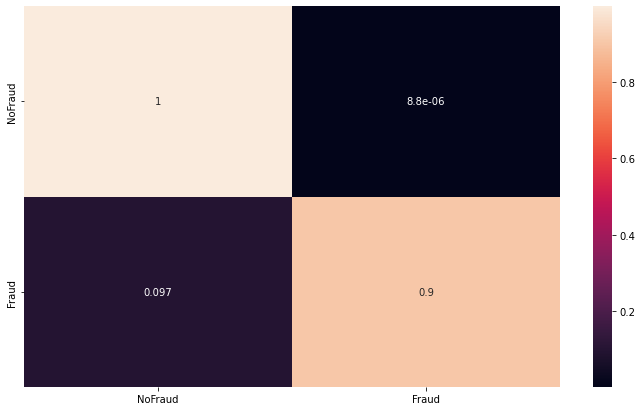

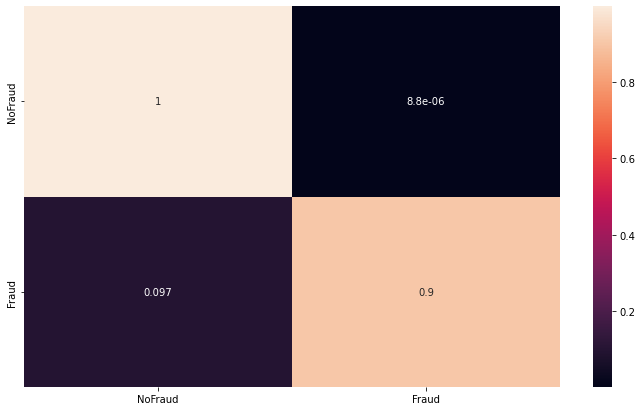

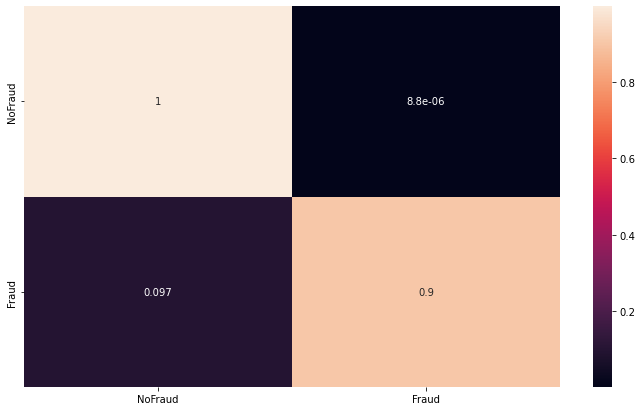

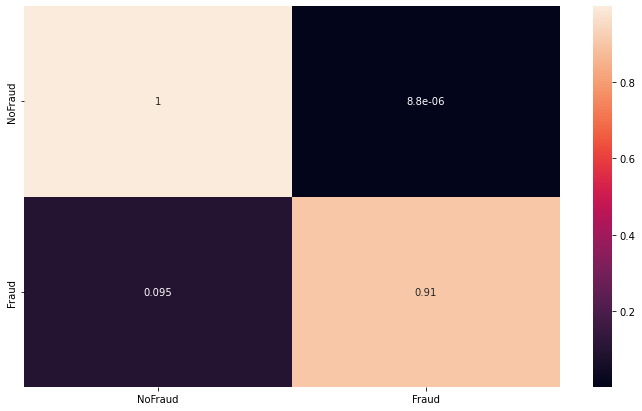

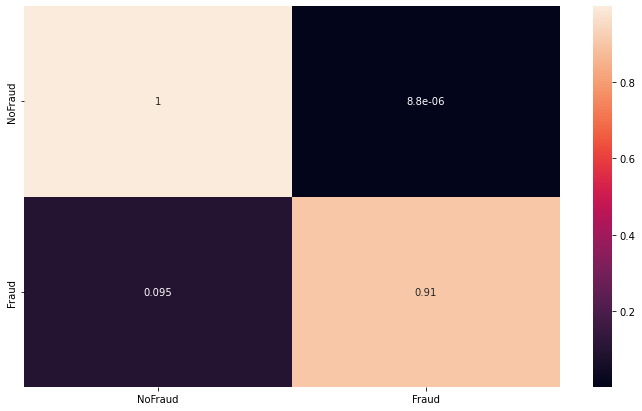

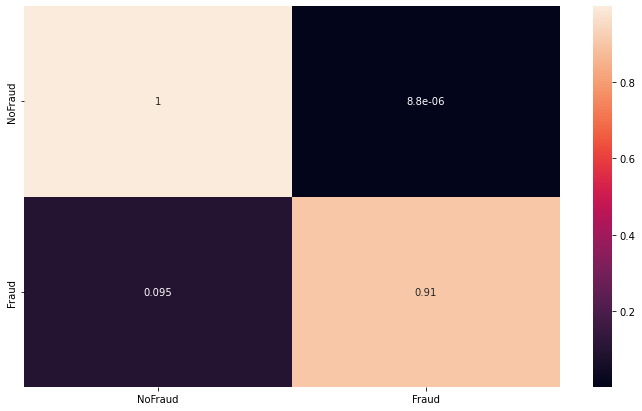

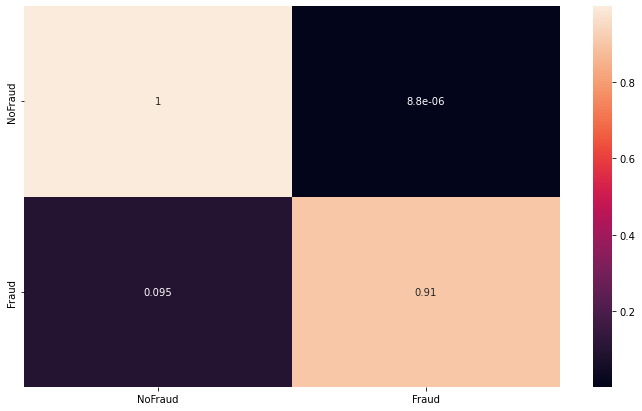

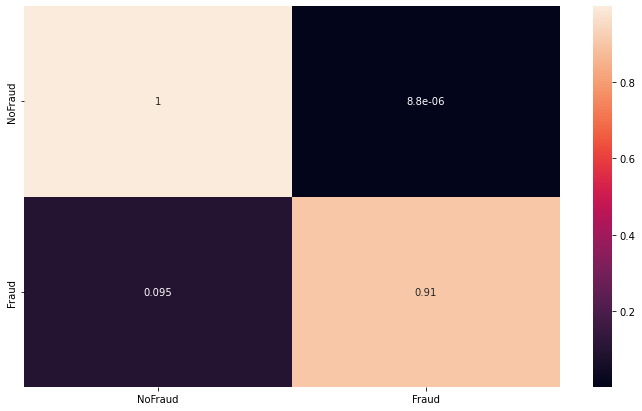

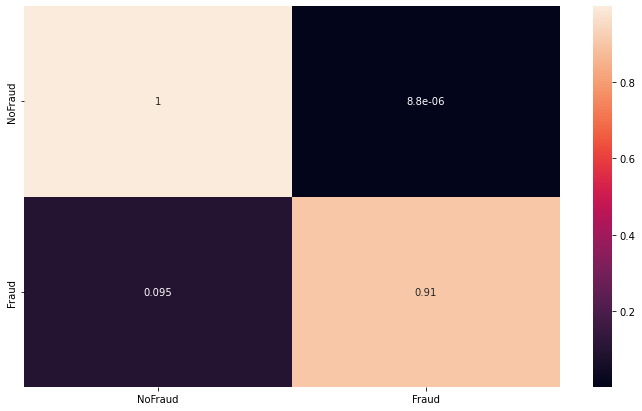

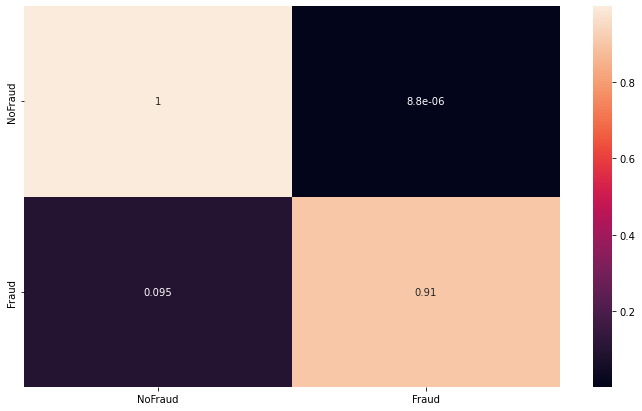

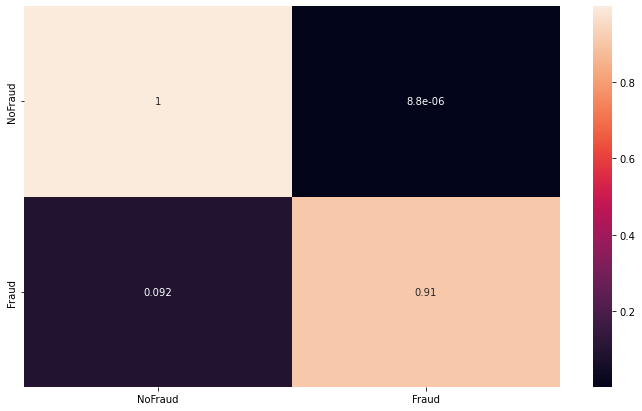

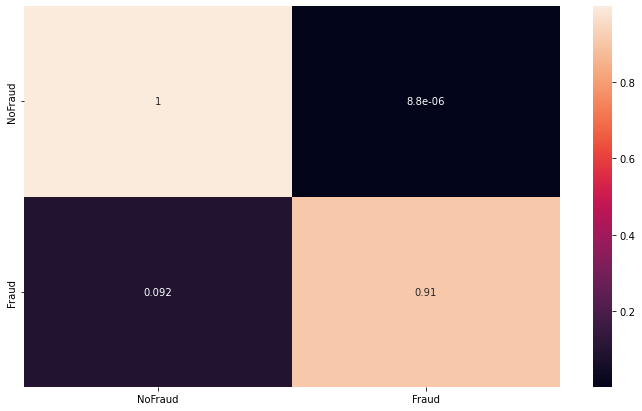

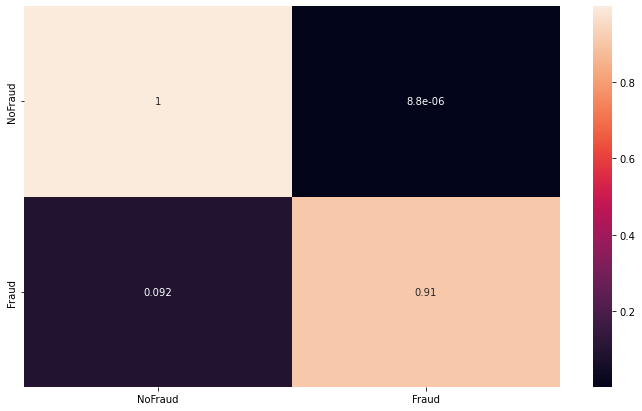

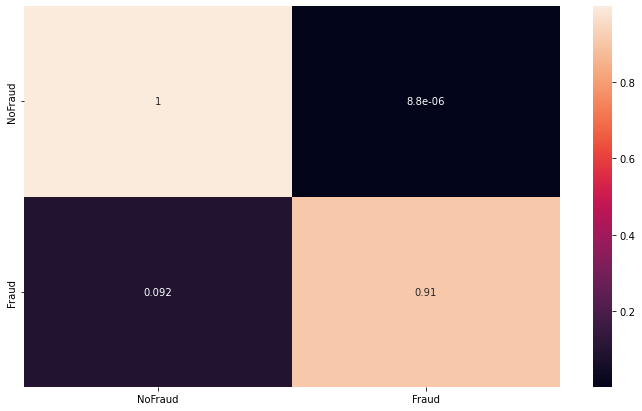

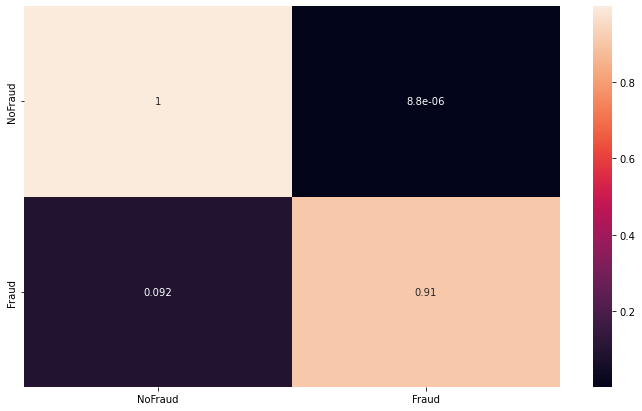

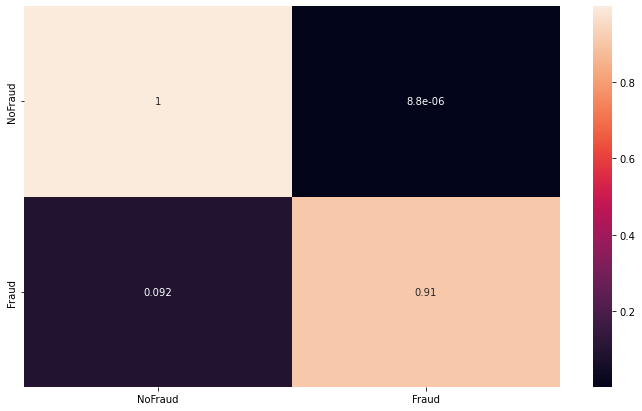

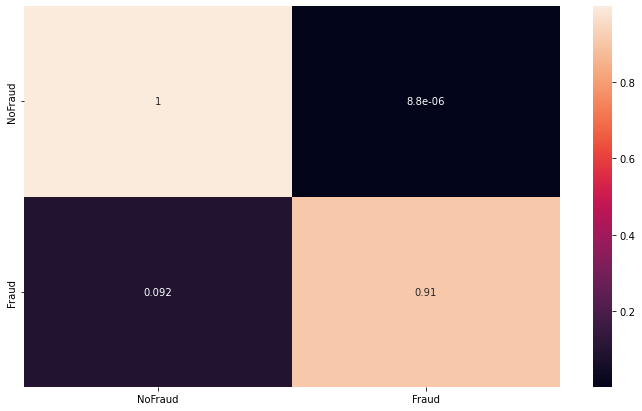

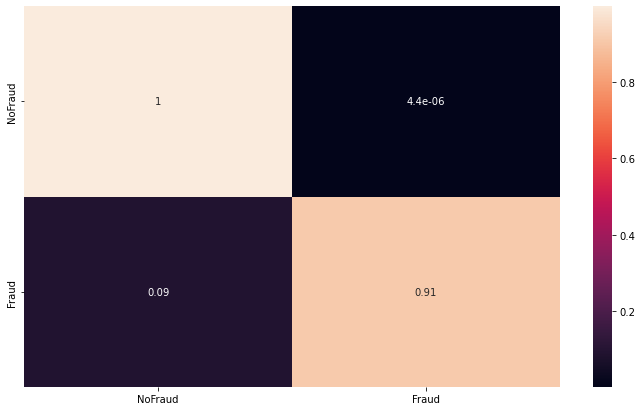

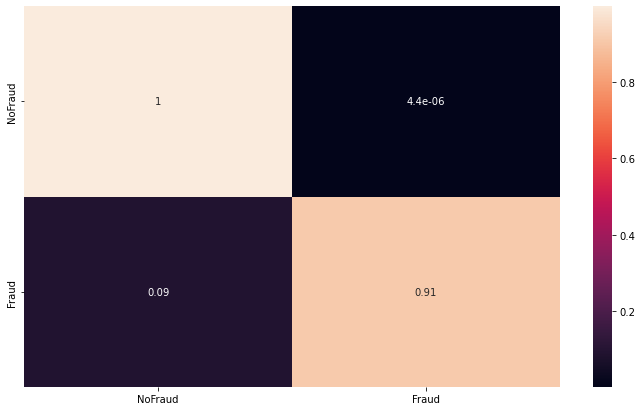

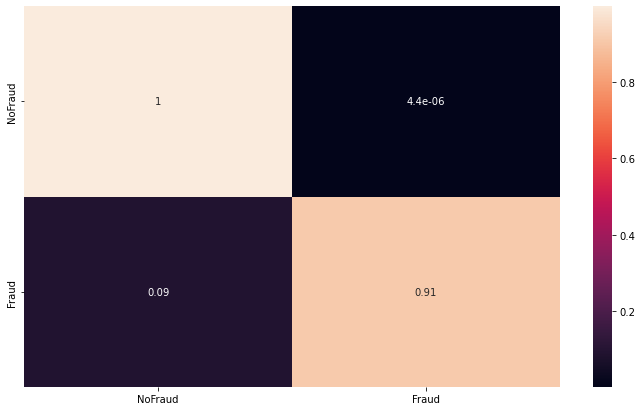

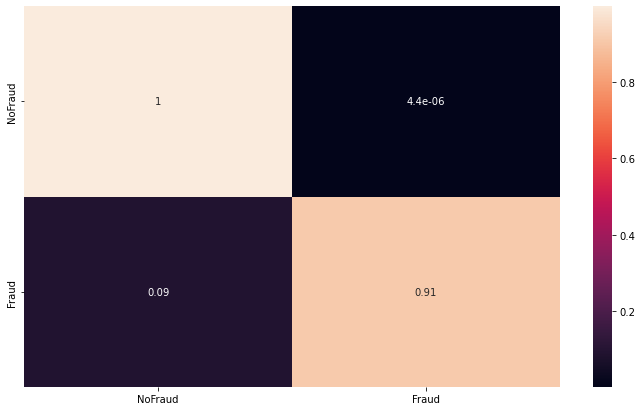

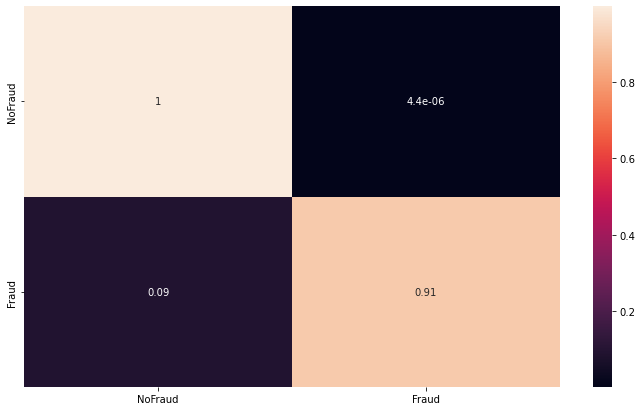

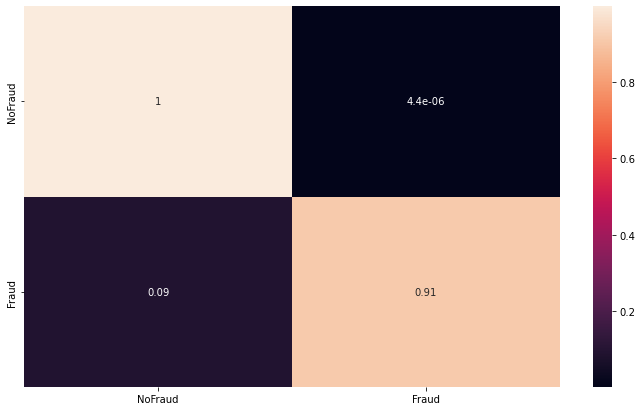

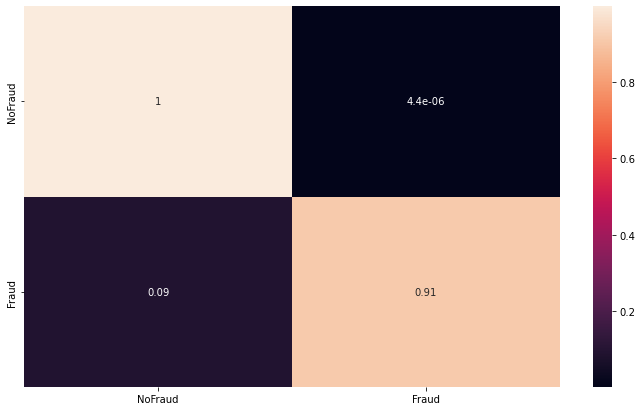

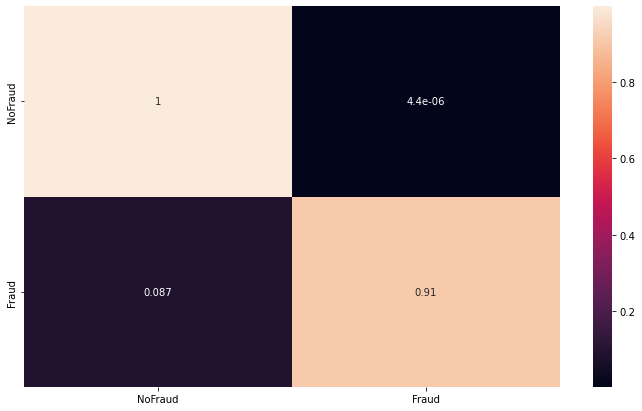

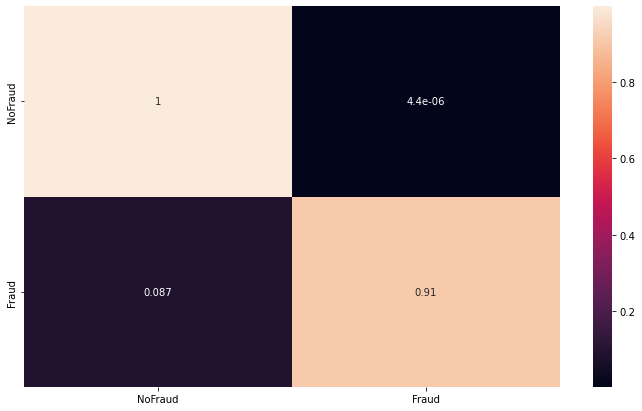

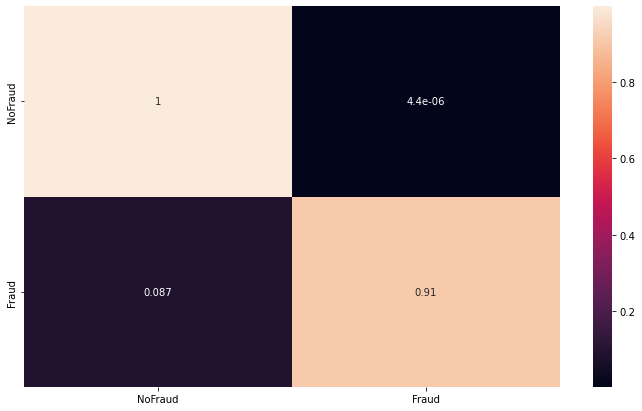

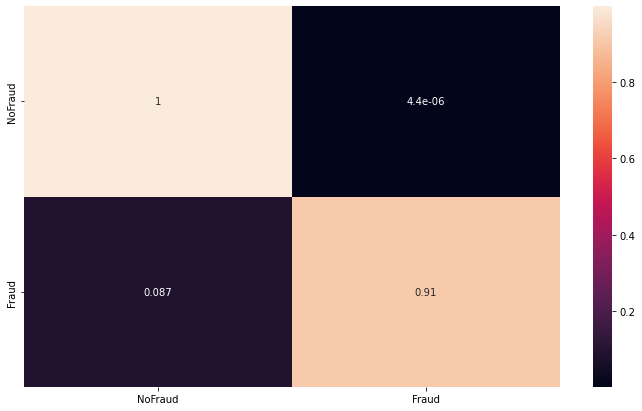

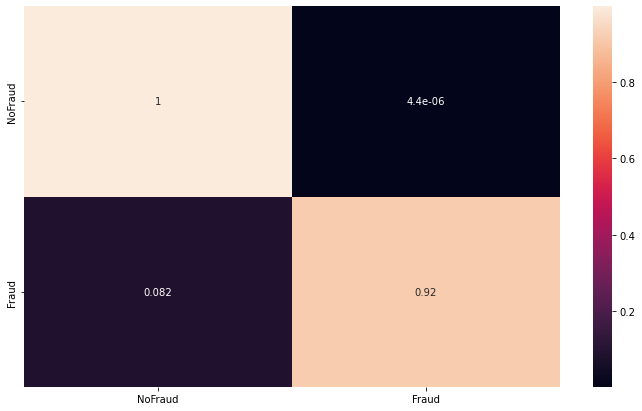

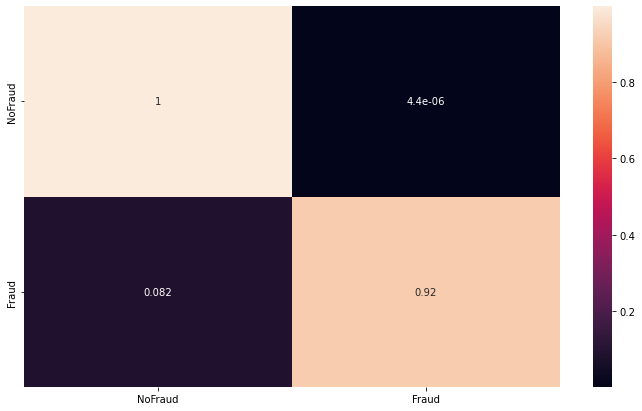

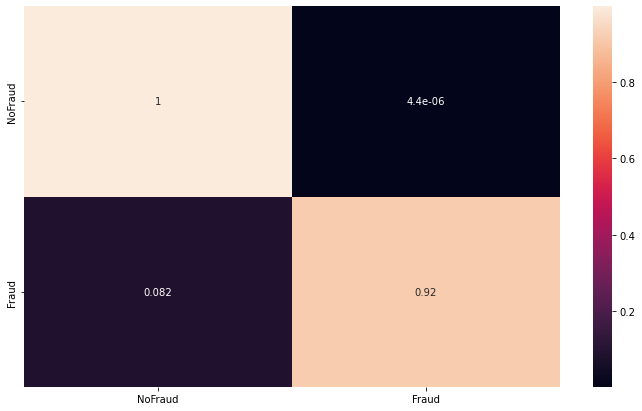

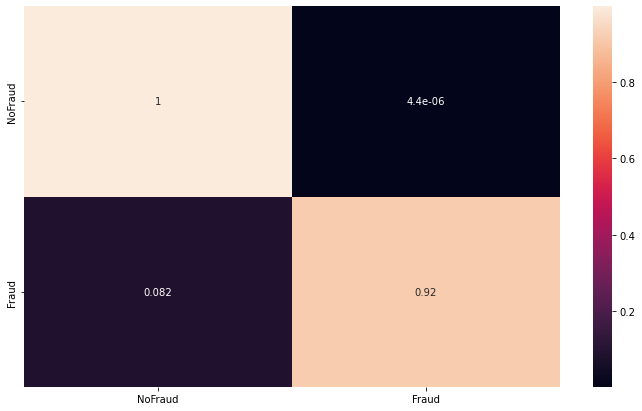

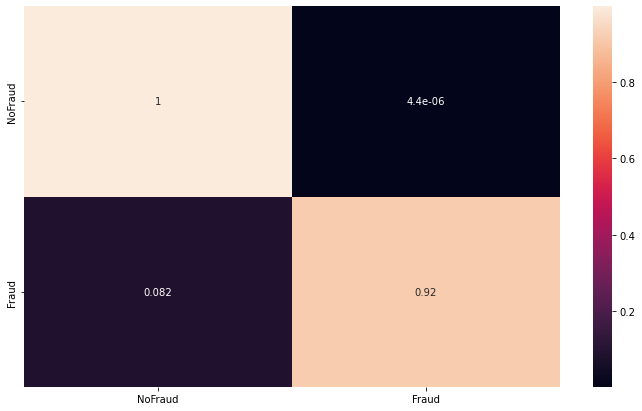

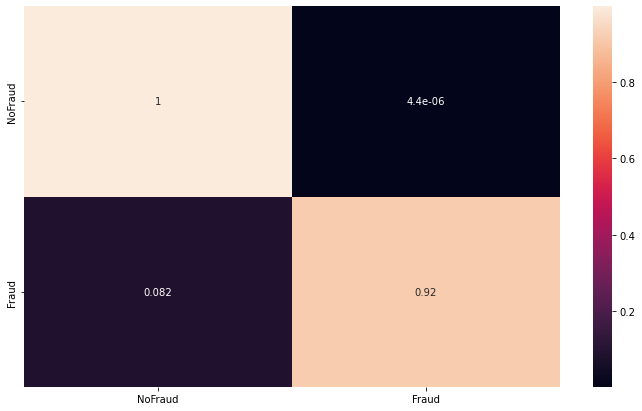

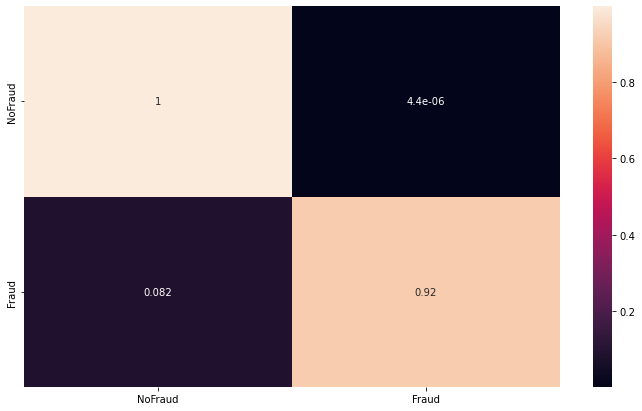

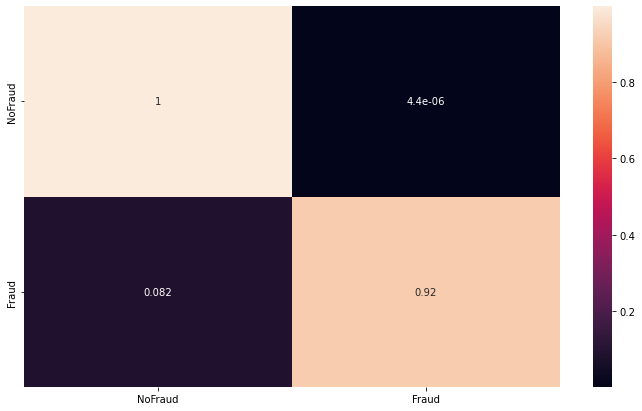

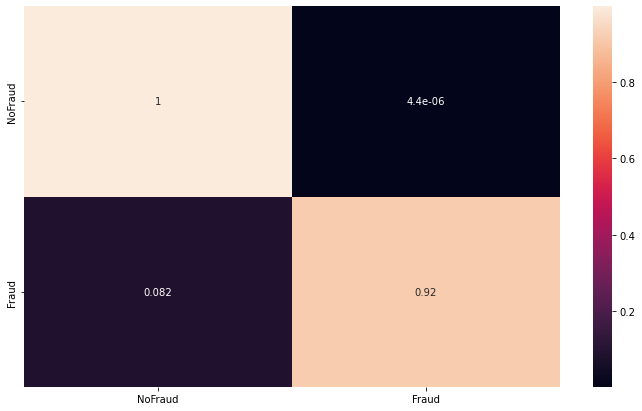

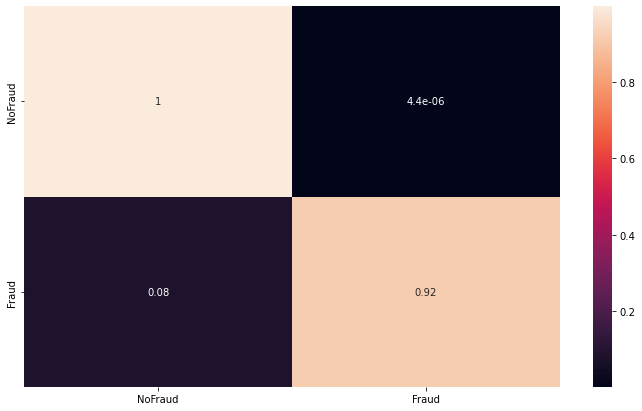

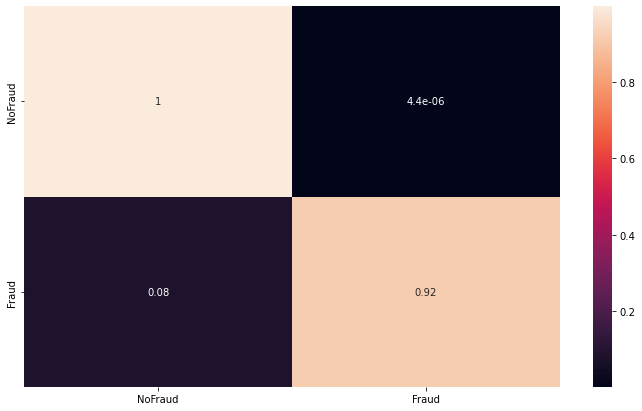

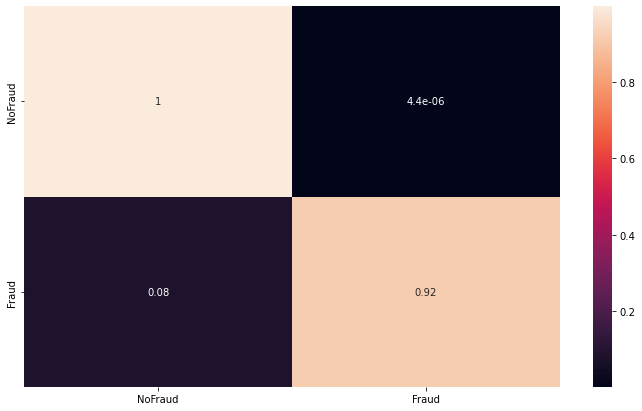

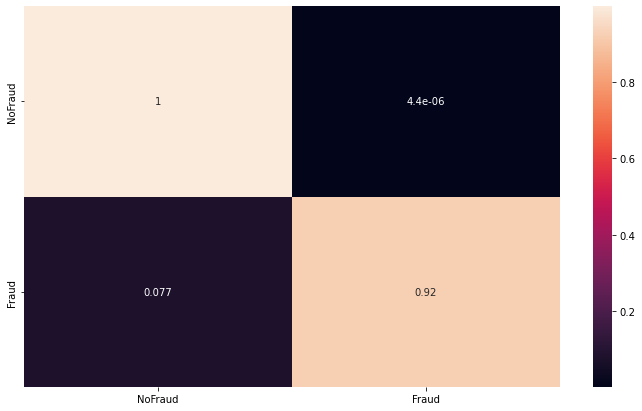

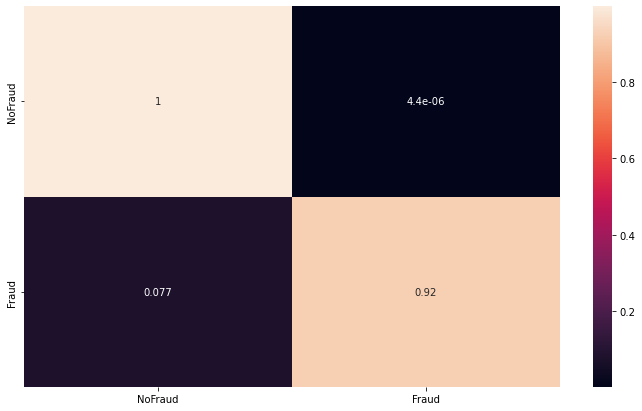

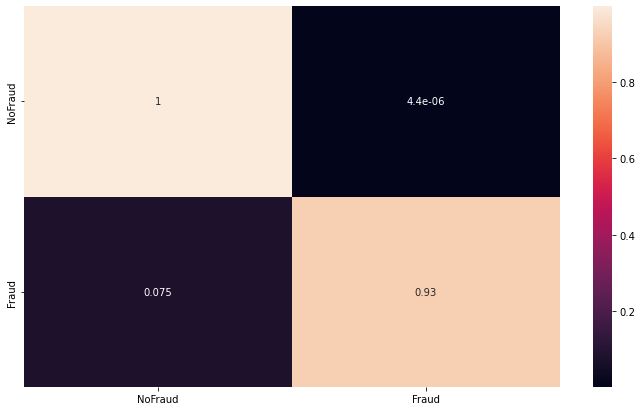

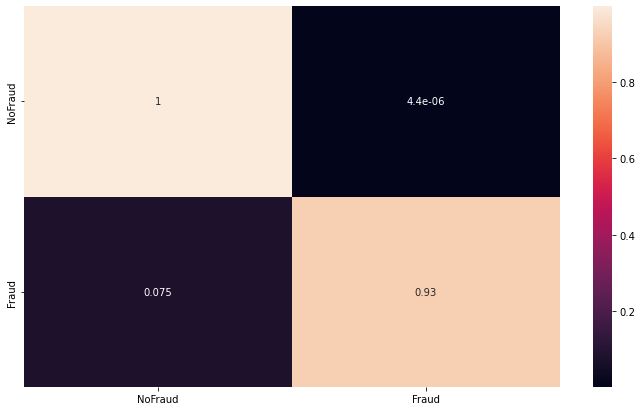

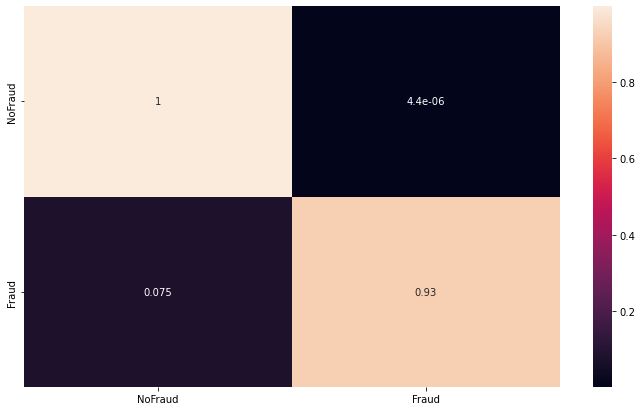

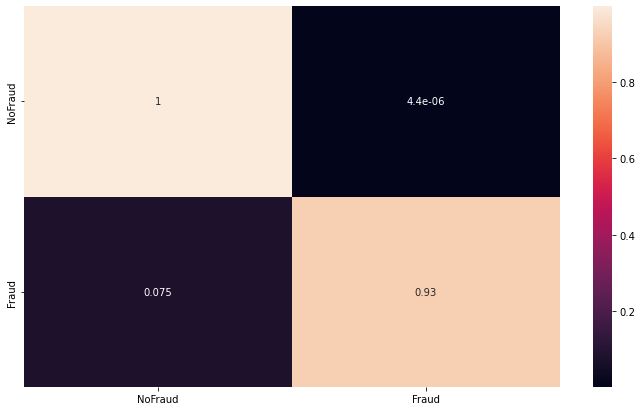

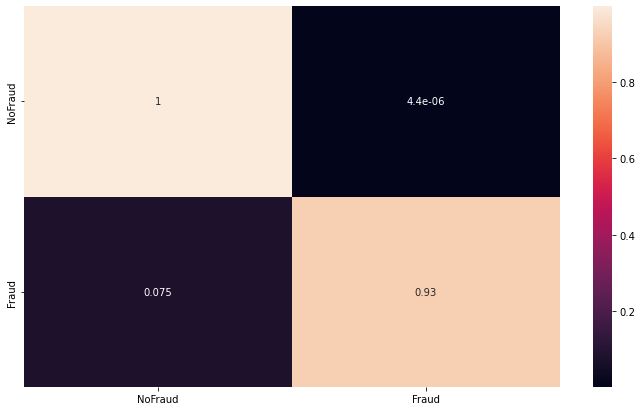

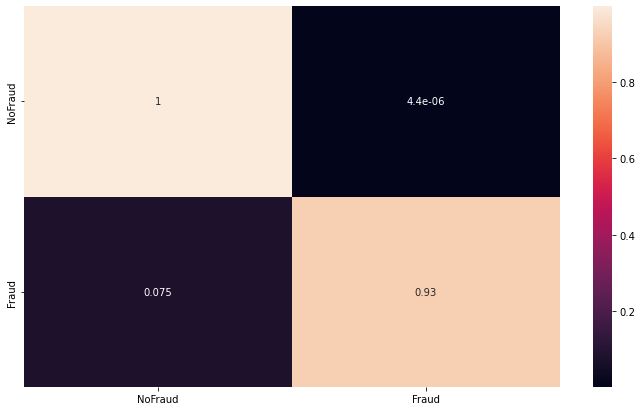

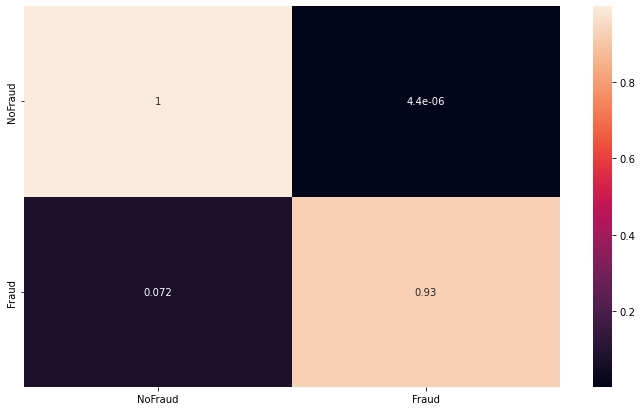

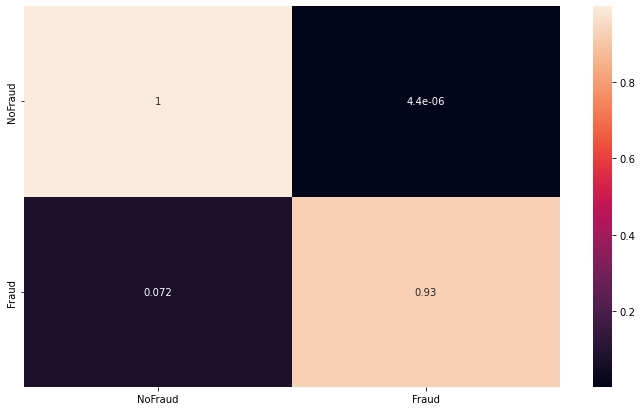

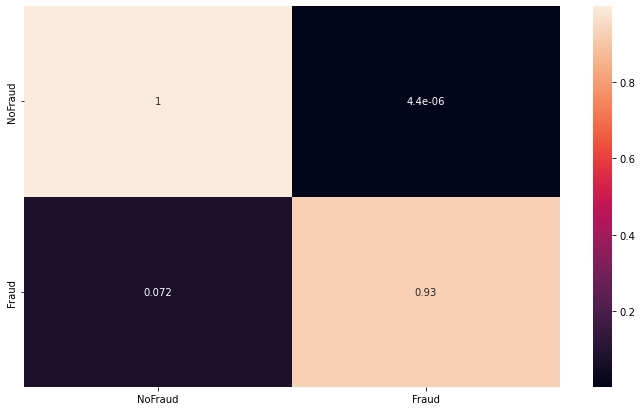

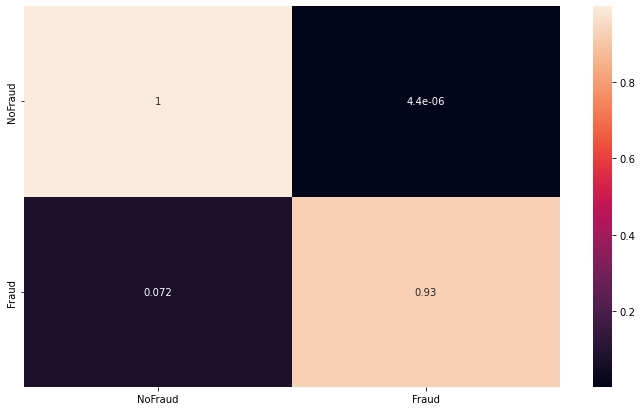

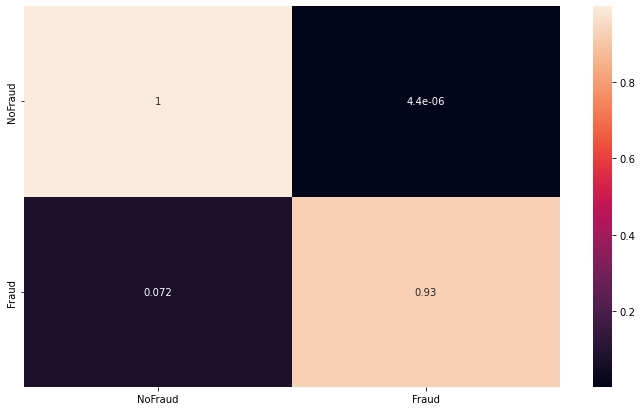

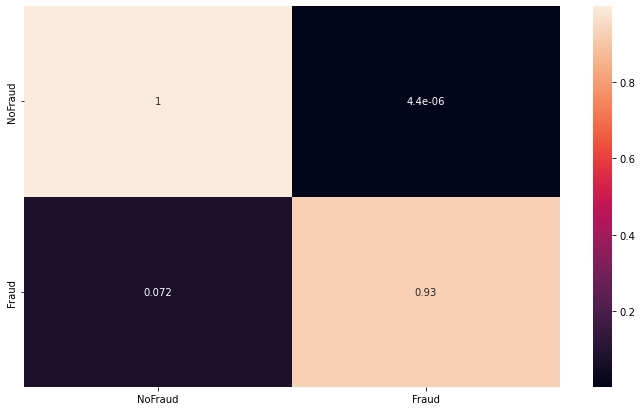

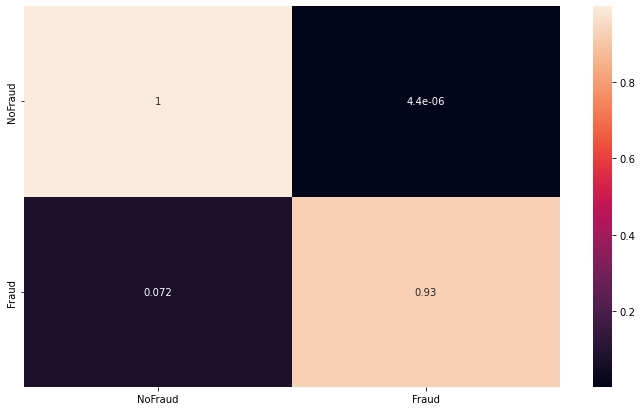

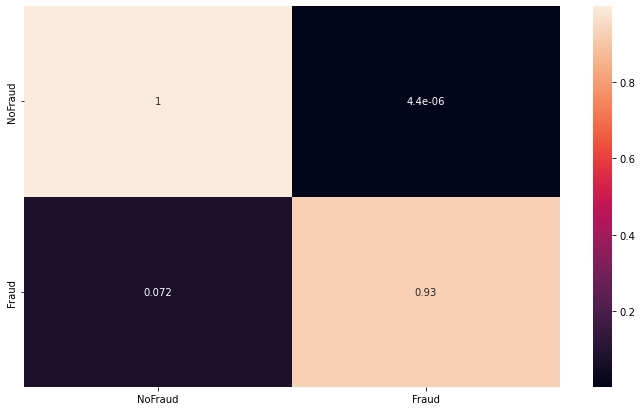

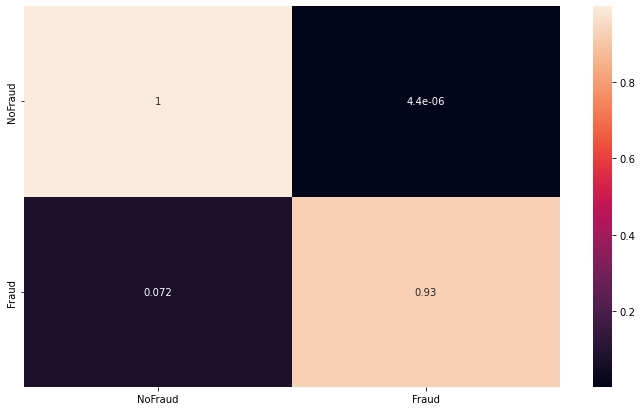

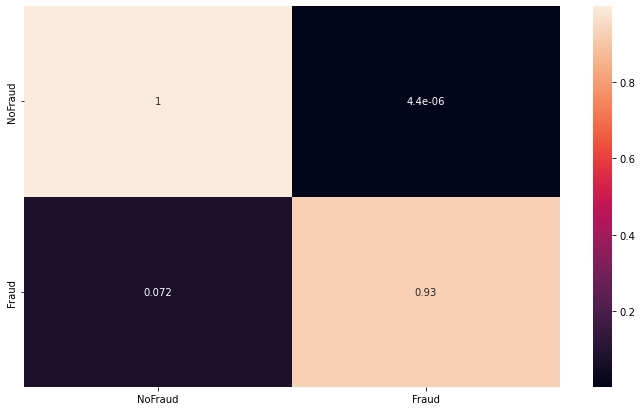

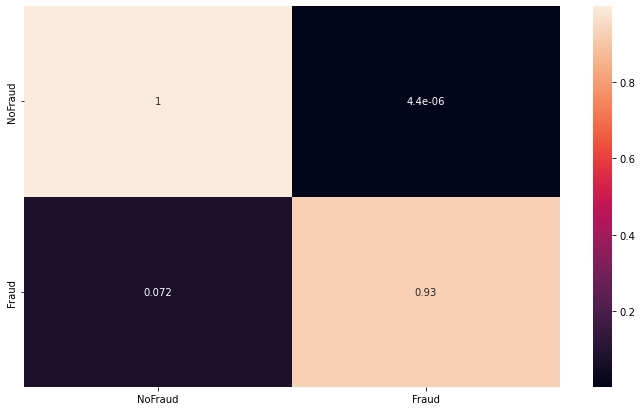

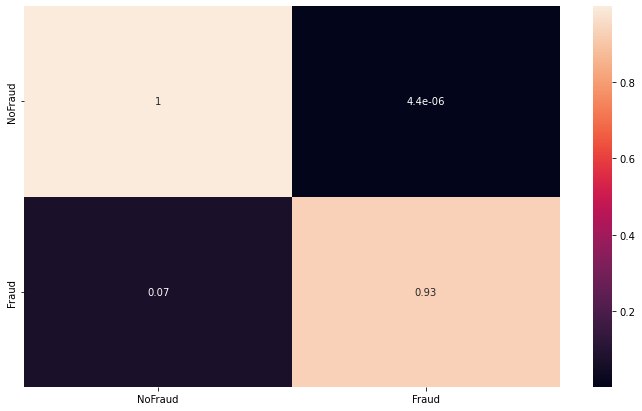

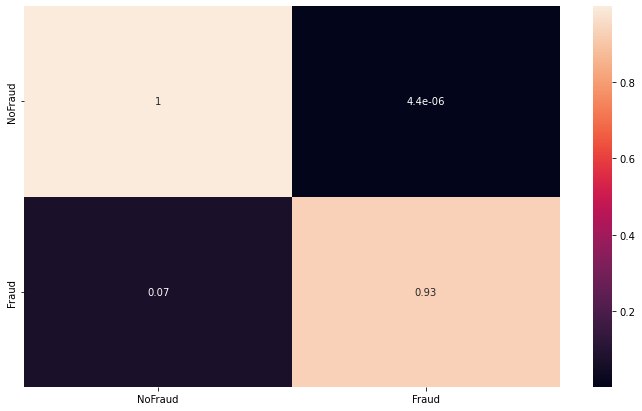

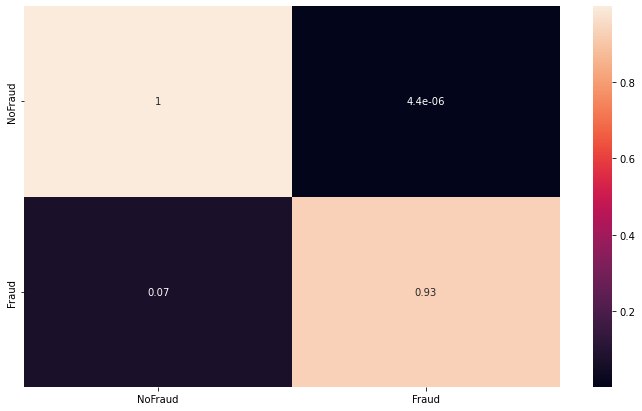

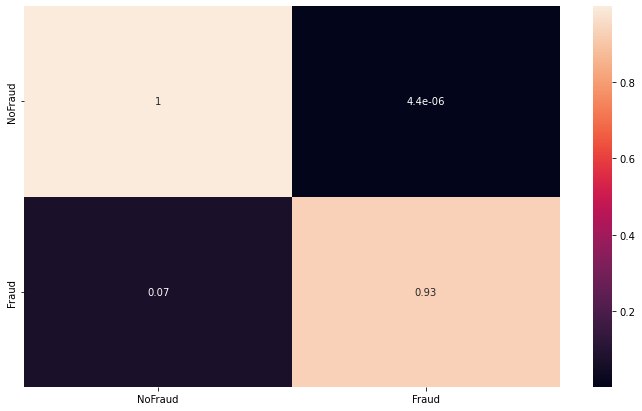

In [107]:
def compute_accuracy(model,features,targets):#, data_loader, device):
    correct_pred, num_examples = 0, 0
    features = features
    targets = targets
    #for i, (features, targets) in enumerate(data_loader):
        #print(features)
        #print(targets)
        #features = features.to(device)
        #targets = targets.to(device)

    logits, probas = model(features)
    _, predicted_labels = torch.max(probas, 1)
    num_examples += targets.size(0)
    correct_pred += (predicted_labels == targets).sum()
    #Building Confusion matrix - https://christianbernecker.medium.com/how-to-create-a-confusion-matrix-in-pytorch-38d06a7f04b7

    # constant for classes
    classes = ('NoFraud','Fraud')

    # Build confusion matrix
    cf_matrix = confusion_matrix(y, predicted_labels)
    #print(cf_matrix)
    df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                         columns = [i for i in classes])
    #print(df_cm)
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cm, annot=True)
    plt.savefig('output.png')
    return correct_pred.float()/num_examples * 100

start_time = time.time()
minibatch_cost = []

#NUM_EPOCHS = 25

#Split X (features) and y (targets) for the dataset
X=np.delete(train_dataset,-1,axis=1)
y = np.delete(train_dataset,np.s_[0:28],axis=1).flatten()
features = torch.tensor(X, dtype=torch.float).to(DEVICE)
targets = torch.tensor(y, dtype=torch.long).to(DEVICE)
# create DataLoader, then take one batch

#Data loader for text data in Pytorch - https://machinelearningmastery.com/training-a-pytorch-model-with-dataloader-and-dataset/
#loader = DataLoader(list(zip(X,y)), shuffle=True, batch_size=16)
#for X_batch, y_batch in loader:
#    print(X_batch, y_batch)
#    break

for epoch in range(NUM_EPOCHS):
    loader = DataLoader(list(zip(X,y)), shuffle=True, batch_size=40000)
    for X_batch, y_batch in loader:
        #print(X_batch, y_batch)
        ### FORWARD AND BACK PROP
        logits, probas = model1(features)

        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()

        cost.backward()
        minibatch_cost.append(cost)
        ### UPDATE MODEL PARAMETERS
        optimizer.step()

        ### LOGGING

        model1.eval()
        with torch.set_grad_enabled(False): # save memory during inference
            print('Epoch: %03d/%03d | Train: %.3f%%' % (
                  epoch+1, NUM_EPOCHS, 
                  compute_accuracy(model1, features, targets)))#, train_loader, device=DEVICE)))

        print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

<br>
<br>

Test accuracy: 99.95%


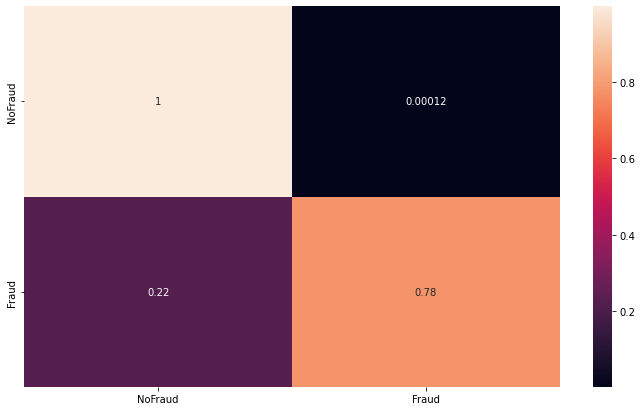

In [108]:
##########################
### Evaludation and Acccuracy Confusion Matrix
##########################

#Split X (features) and y (targets) for the dataset
X=np.delete(test_dataset,-1,axis=1)
y = np.delete(test_dataset,np.s_[0:28],axis=1).flatten()
features = torch.tensor(X, dtype=torch.float).to(DEVICE)
targets = torch.tensor(y, dtype=torch.long).to(DEVICE)


with torch.set_grad_enabled(False): # save memory during inference
    print('Test accuracy: %.2f%%' % (compute_accuracy(model1, features, targets)))